# JWST Tutorial

In this tutorial we will try to download some publically available data from JWST and fit it with chromatic! We will use the early release NIRISS [observations of HAT-P-18b](https://www.stsci.edu/jwst/science-execution/approved-programs/webb-first-image-observations) as in the [chromatic quickstart tutorial](https://zkbt.github.io/chromatic/quickstart/). You'll need to retrieve the HAT-P-18 files [here](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html?searchQuery=%7B%22service%22%3A%22CAOMFILTERED%22%2C%22inputText%22%3A%5B%7B%22paramName%22%3A%22obs_collection%22%2C%22niceName%22%3A%22obs_collection%22%2C%22values%22%3A%5B%22JWST%22%5D%2C%22valString%22%3A%22JWST%22%2C%22isDate%22%3Afalse%2C%22separator%22%3A%22%3B%22%2C%22facetType%22%3A%22discrete%22%2C%22displayString%22%3A%22JWST%22%7D%2C%7B%22paramName%22%3A%22proposal_id%22%2C%22niceName%22%3A%22proposal_id%22%2C%22values%22%3A%5B%5D%2C%22valString%22%3A%222734%22%2C%22isDate%22%3Afalse%2C%22freeText%22%3A%222734%22%2C%22displayString%22%3A%222734%22%7D%5D%2C%22position%22%3A%22undefined%2C%20undefined%2C%20undefined%22%2C%22paramsService%22%3A%22Mast.Caom.Filtered%22%2C%22title%22%3A%22MAST%3A%20%20Advanced%20Search%2017%22%2C%22tooltip%22%3A%22JWST%3B%202734%3B%20%22%2C%22columns%22%3A%22*%22%2C%22columnsConfig%22%3A%22Mast.Caom.Cone%22%7D) and save them somewhere handy on your computer.

([chromatic](https://zkbt.github.io/chromatic/) documentation)

([chromatic_fitting](https://catrionamurray.github.io/chromatic_fitting/) documentation)

- To start this tutorial you can (optionally) create a new conda environment (need Python >=3.8!):

    `conda create -n jwst_tutorial python=3.9`

    `conda activate jwst_tutorial`


- To install `chromatic` **only** you need to run:

    `pip install chromatic-lightcurves`


- **Or** you can install `chromatic-fitting` (which will install `chromatic` as one of its requirements):

    `pip install chromatic-lightcurves`

# chromatic

In [1]:
from chromatic import *

In [2]:
from astroquery.mast import Observations

In [ ]:
Observations.download_file(
    f"mast:JWST/product/jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits"
);

In [3]:
fits.open('jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits')["PRIMARY"].header['CAL_VER']

'1.7.2'

In [2]:
jwst_dir = "jwst_data"

# # ALTERNATIVE FILES YOU CAN LOAD WITH CHROMATIC
# # files for WASP-96
# # WARNING: the current version (1.7.2) on MAST has a different version type (1.5.3) for 3rd file!
# targ = "WASP-96"
# wasp96_v1_7_2 = f"{jwst_dir}/{targ}/jw02734002001_04101_00001-seg00*_nis/jw02734002001_04101_00001-seg00*_nis_x1dints.fits"
# wasp96_v1_5_3 = f"{jwst_dir}/{targ}/jw02734/jw02734002001/*x1dints.fits"

# # files for WASP-39
# targ = "WASP-39"
# wasp39 = f"{jwst_dir}/{targ}/jw01366001001_04101_00001-seg00*_nis/*x1dints.fits"
# rainbow = read_rainbow(wasp39)
# wasp39_eureka_s3 = f"{jwst_dir}/{targ}/S3_wasp39b_ap6_bg7_SpecData.h5"
# wasp39_eureka_s4 = f"{jwst_dir}/{targ}/S4_wasp39b_ap6_bg7_SpecData.h5"
# rainbow_eureka_s3 = read_rainbow(wasp39_eureka_s3)
# rainbow_eureka_s4 = read_rainbow(wasp39_eureka_s4)

# # files for HAT-P-18
# targ = "HAT-P-18"
# hatp18 = f"{jwst_dir}/{targ}/jw02734001001_04101_00001-seg00*_nis/*x1dints.fits"
# hatp18_stitch = f"{jwst_dir}/{targ}/jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits"

rainbow = read_rainbow("jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits")

🌈🤖 This file contains data for 3 spectrosopic orders. Because no
`order=` keyword was supplied, we're defaulting to first order. You can
hide this warning by expliciting stating which order you want to load.
For this file, the options include [1 2 3].

🌈🤖 YIKES! In our testing, we've found that some data products from Stage 3 of the
STScI `jwst` pipeline have weird problems, including integration segments that
have been stitched together in the wrong temporal order and/or missing time
information for the individual integrations. If the `chromatic` reader succeeds
in loading your requested data into a `Rainbow` object, you should still be
very suspicious of them!

A reasonable alternative, if you just want a quick look at the time-series
spectra for your dataset, is to try to load the Stage 2 pipeline `x1dints`
files. They won't have Stage 3's outlier-rejection applied (of which folks
anyway still a little suspicious) but should otherwise be similar. These
file(s) may be split into mult

  0%|          | 0/469 [00:00<?, ?it/s]

🌈🤖 The number of available integration extensions (1407) in this file
does not match the expected number (462) for this segment.
However, this seems to be a Stage 3 `x1dints` file where the
`INTSTART` + `INTEND` keywords sometimes behave weirdly, so it's
probably OK not to worry about this. We'll proceed by trying
to load as many EXTRACT1D extensions as we can.

🌈🤖 No wavelength unit was found; assuming 'micron'.



  0%|          | 0/469 [00:00<?, ?it/s]

🌈🤖 The 2048 input wavelengths were not monotonically increasing.
<🌈(2048w, 469t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.

🌈🤖 The 2048 input wavelengths were not monotonically increasing.
<🌈(2048w, 469t)> has been sorted from lowest to highest wavelength.
If you want to recover the original wavelength order, the original
wavelength indices are available in `rainbow.original_wave_index`.



In [3]:
# rainbow_eureka_s3.wavelike["ok"] = rainbow_eureka_s3.wavelength.to_value("micron") > 1.2
# rainbow_eureka_s4.wavelike["ok"] = rainbow_eureka_s3.wavelength.to_value("micron") > 1.2

# fi, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
# rainbow_eureka_s3.trim().normalize().imshow(ax=ax[0])
# ax[0].set_title("Eureka! S3")
# rainbow_eureka_s4.trim().normalize().imshow(ax=ax[1])
# ax[1].set_title("Eureka! S4");

In [4]:
rainbow

<🌈(2048w, 469t)>

<🌈(2048w, 469t)>

In [54]:
rainbow.wavelength

<Quantity [0.84619656, 0.8470795 , 0.84796257, ..., 2.83119683, 2.83220758,
           2.83321843] micron>

In [55]:
rainbow.time

<Quantity [2459743.69672653, 2459743.6973623 , 2459743.69799807,
           2459743.69863384, 2459743.69926961, 2459743.69990538,
           2459743.70054115, 2459743.70117692, 2459743.70181269,
           2459743.70244846, 2459743.70308423, 2459743.70372   ,
           2459743.70435578, 2459743.70499155, 2459743.70562732,
           2459743.70626309, 2459743.70689886, 2459743.70753463,
           2459743.7081704 , 2459743.70880617, 2459743.70944194,
           2459743.71007771, 2459743.71071348, 2459743.71134925,
           2459743.71198503, 2459743.7126208 , 2459743.71325657,
           2459743.71389234, 2459743.71452811, 2459743.71516388,
           2459743.71579965, 2459743.71643542, 2459743.71707119,
           2459743.71770696, 2459743.71834273, 2459743.7189785 ,
           2459743.71961427, 2459743.72025005, 2459743.72088582,
           2459743.72152159, 2459743.72215736, 2459743.72279313,
           2459743.7234289 , 2459743.72406467, 2459743.72470044,
           2459743.725336

In [56]:
rainbow.flux

<Quantity [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]] Jy>

In [57]:
rainbow.uncertainty

<Quantity [[1.17644446e-11, 1.10551025e-11, 1.09439203e-11, ...,
            9.14411041e-12, 8.40111408e-12, 8.10466721e-12],
           [3.12609377e-11, 2.93760464e-11, 2.90806087e-11, ...,
            3.31106029e-11, 3.04202312e-11, 2.93468042e-11],
           [3.23022989e-11, 3.03546183e-11, 3.00493390e-11, ...,
            3.44670515e-11, 3.16664628e-11, 3.05490605e-11],
           ...,
           [9.41709297e-09, 8.84928543e-09, 8.76028731e-09, ...,
            9.25328972e-09, 8.50142213e-09, 8.20143572e-09],
           [1.95308069e-08, 1.83531888e-08, 1.81686090e-08, ...,
            1.63304046e-08, 1.50034925e-08, 1.44740700e-08],
           [5.18773628e-08, 4.87493956e-08, 4.82591182e-08, ...,
            5.80900553e-08, 5.33700010e-08, 5.14867543e-08]] Jy>

🌈🤖 The wavelength scale for this rainbow is '?',
and there are 2048 wavelength centers and
2048 wavelength edges defined.

It's hard to imshow something with a wavelength axis
that isn't linearly or logarithmically uniform, or doesn't
at least have its wavelength edges defined. We're giving up
and just using the wavelength index as the wavelength axis.

If you want a real wavelength axis, one solution would
be to bin your wavelengths to a more uniform grid with
`rainbow.bin(R=...)` (for logarithmic wavelengths) or
`rainbow.bin(dw=...)` (for linear wavelengths)

🌈🤖 The wavelength scale for this rainbow is '?',
and there are 2048 wavelength centers and
2048 wavelength edges defined.

It's hard to imshow something with a wavelength axis
that isn't linearly or logarithmically uniform, or doesn't
at least have its wavelength edges defined. We're giving up
and just using the wavelength index as the wavelength axis.

If you want a real wavelength axis, one solution would
be to bin your wavele

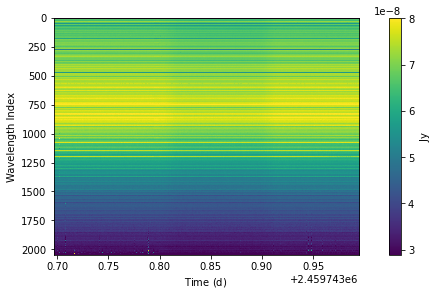

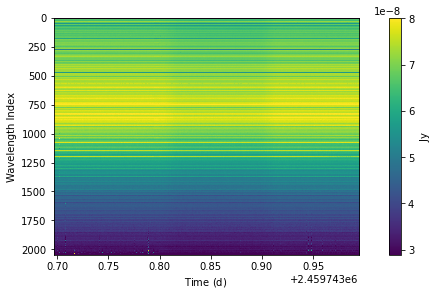

In [5]:
# rainbow.wavelike["ok"] = rainbow.wavelength.to_value("micron") > 1.2
# rainbow.timelike["ok"] = rainbow.time.to_value("d") < 2459751.85
rainbow.trim().imshow();

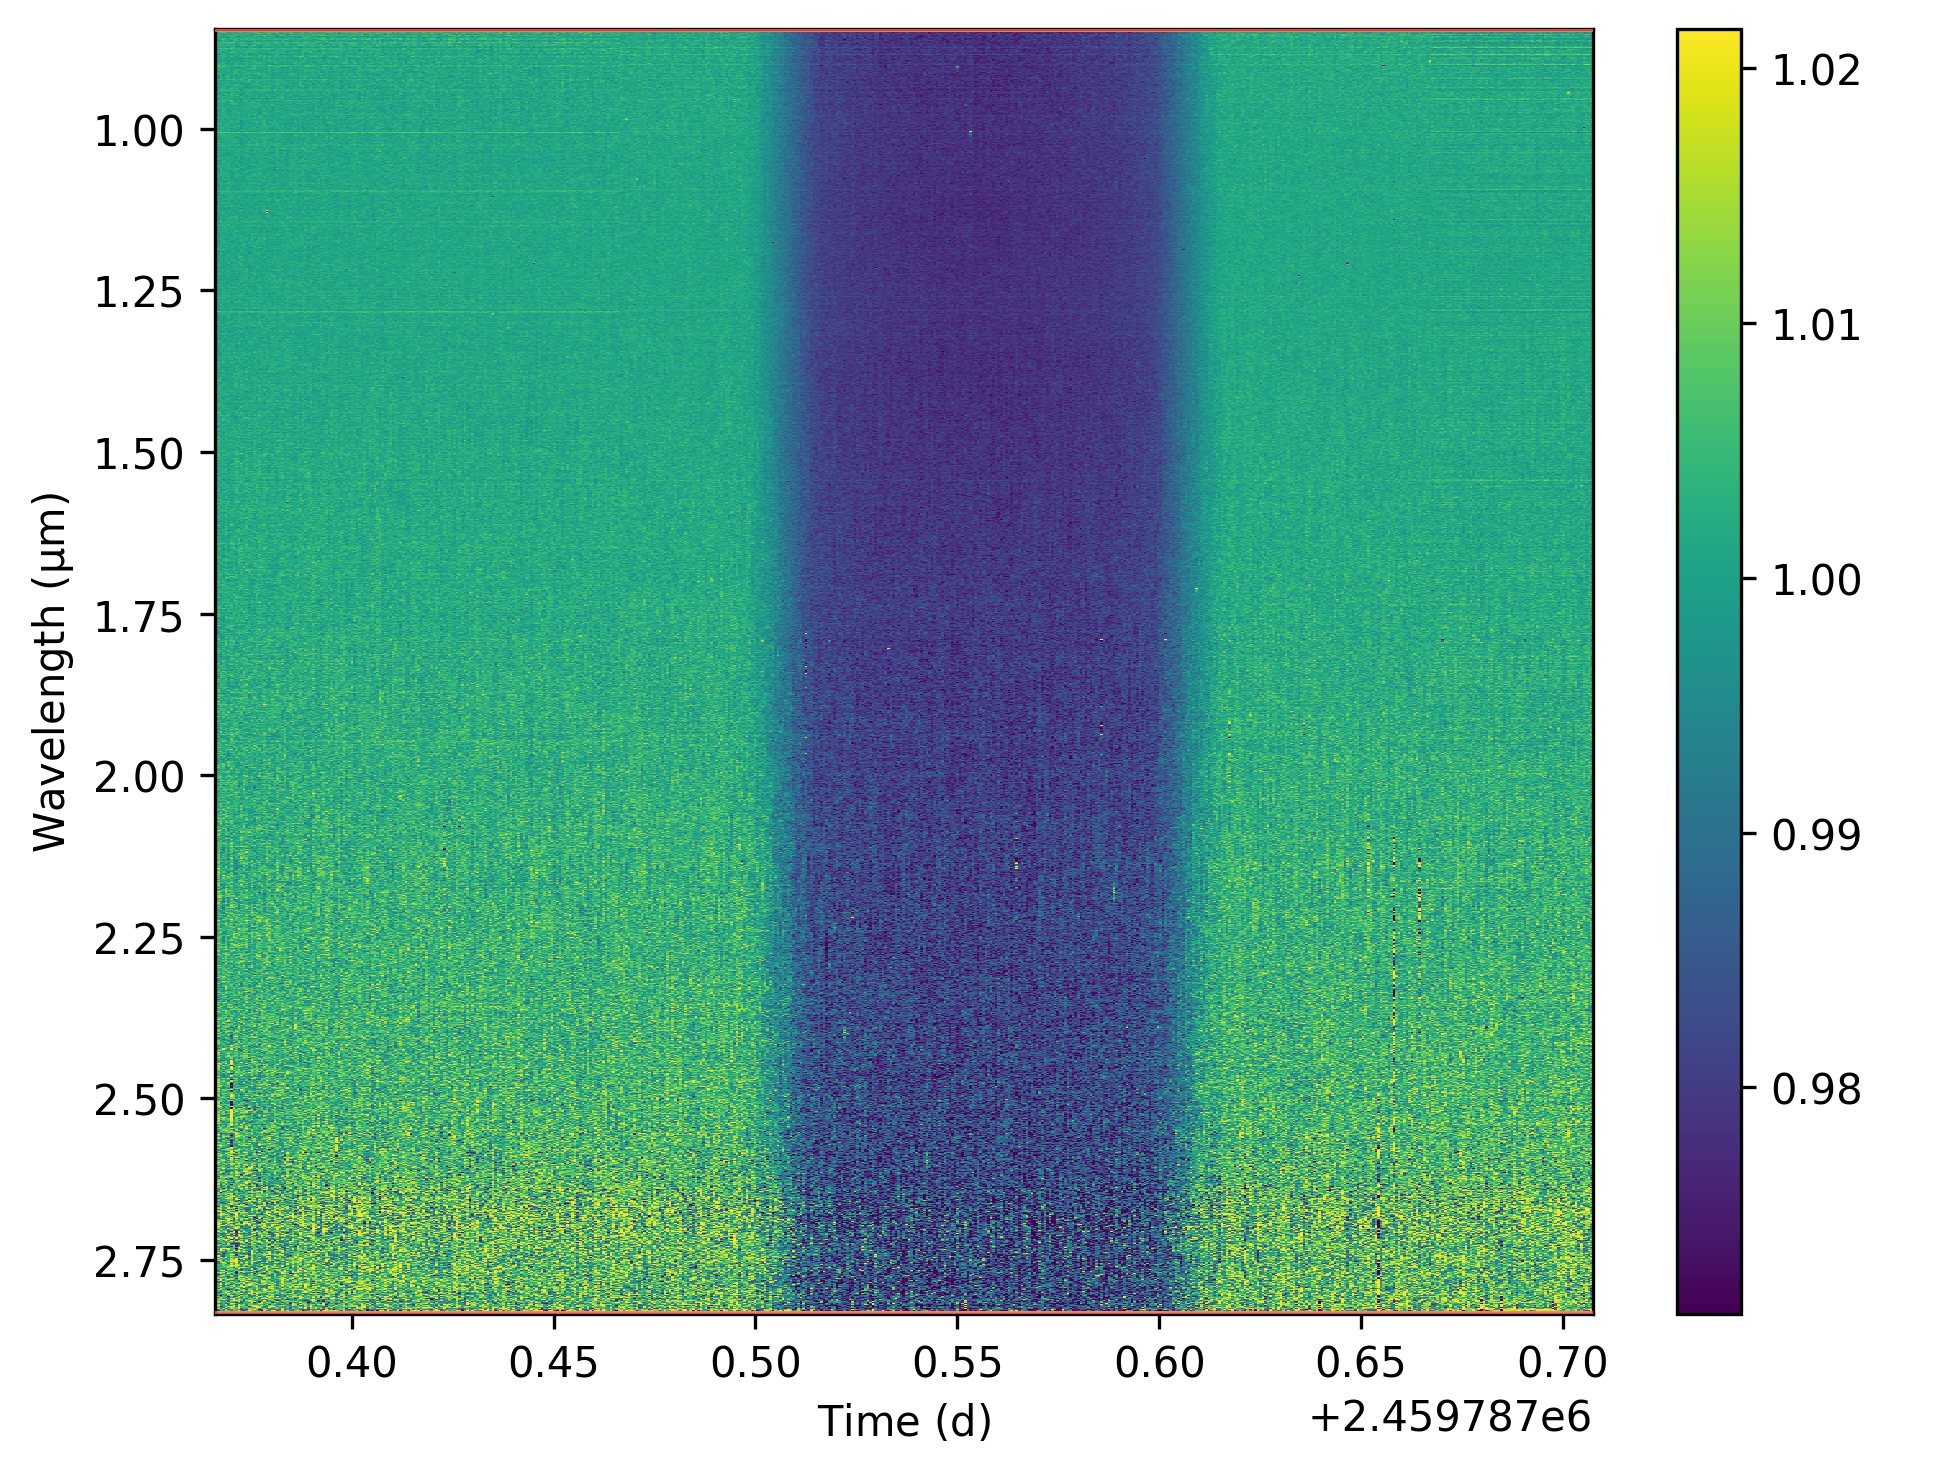

In [41]:
rainbow.trim().normalize().pcolormesh();

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

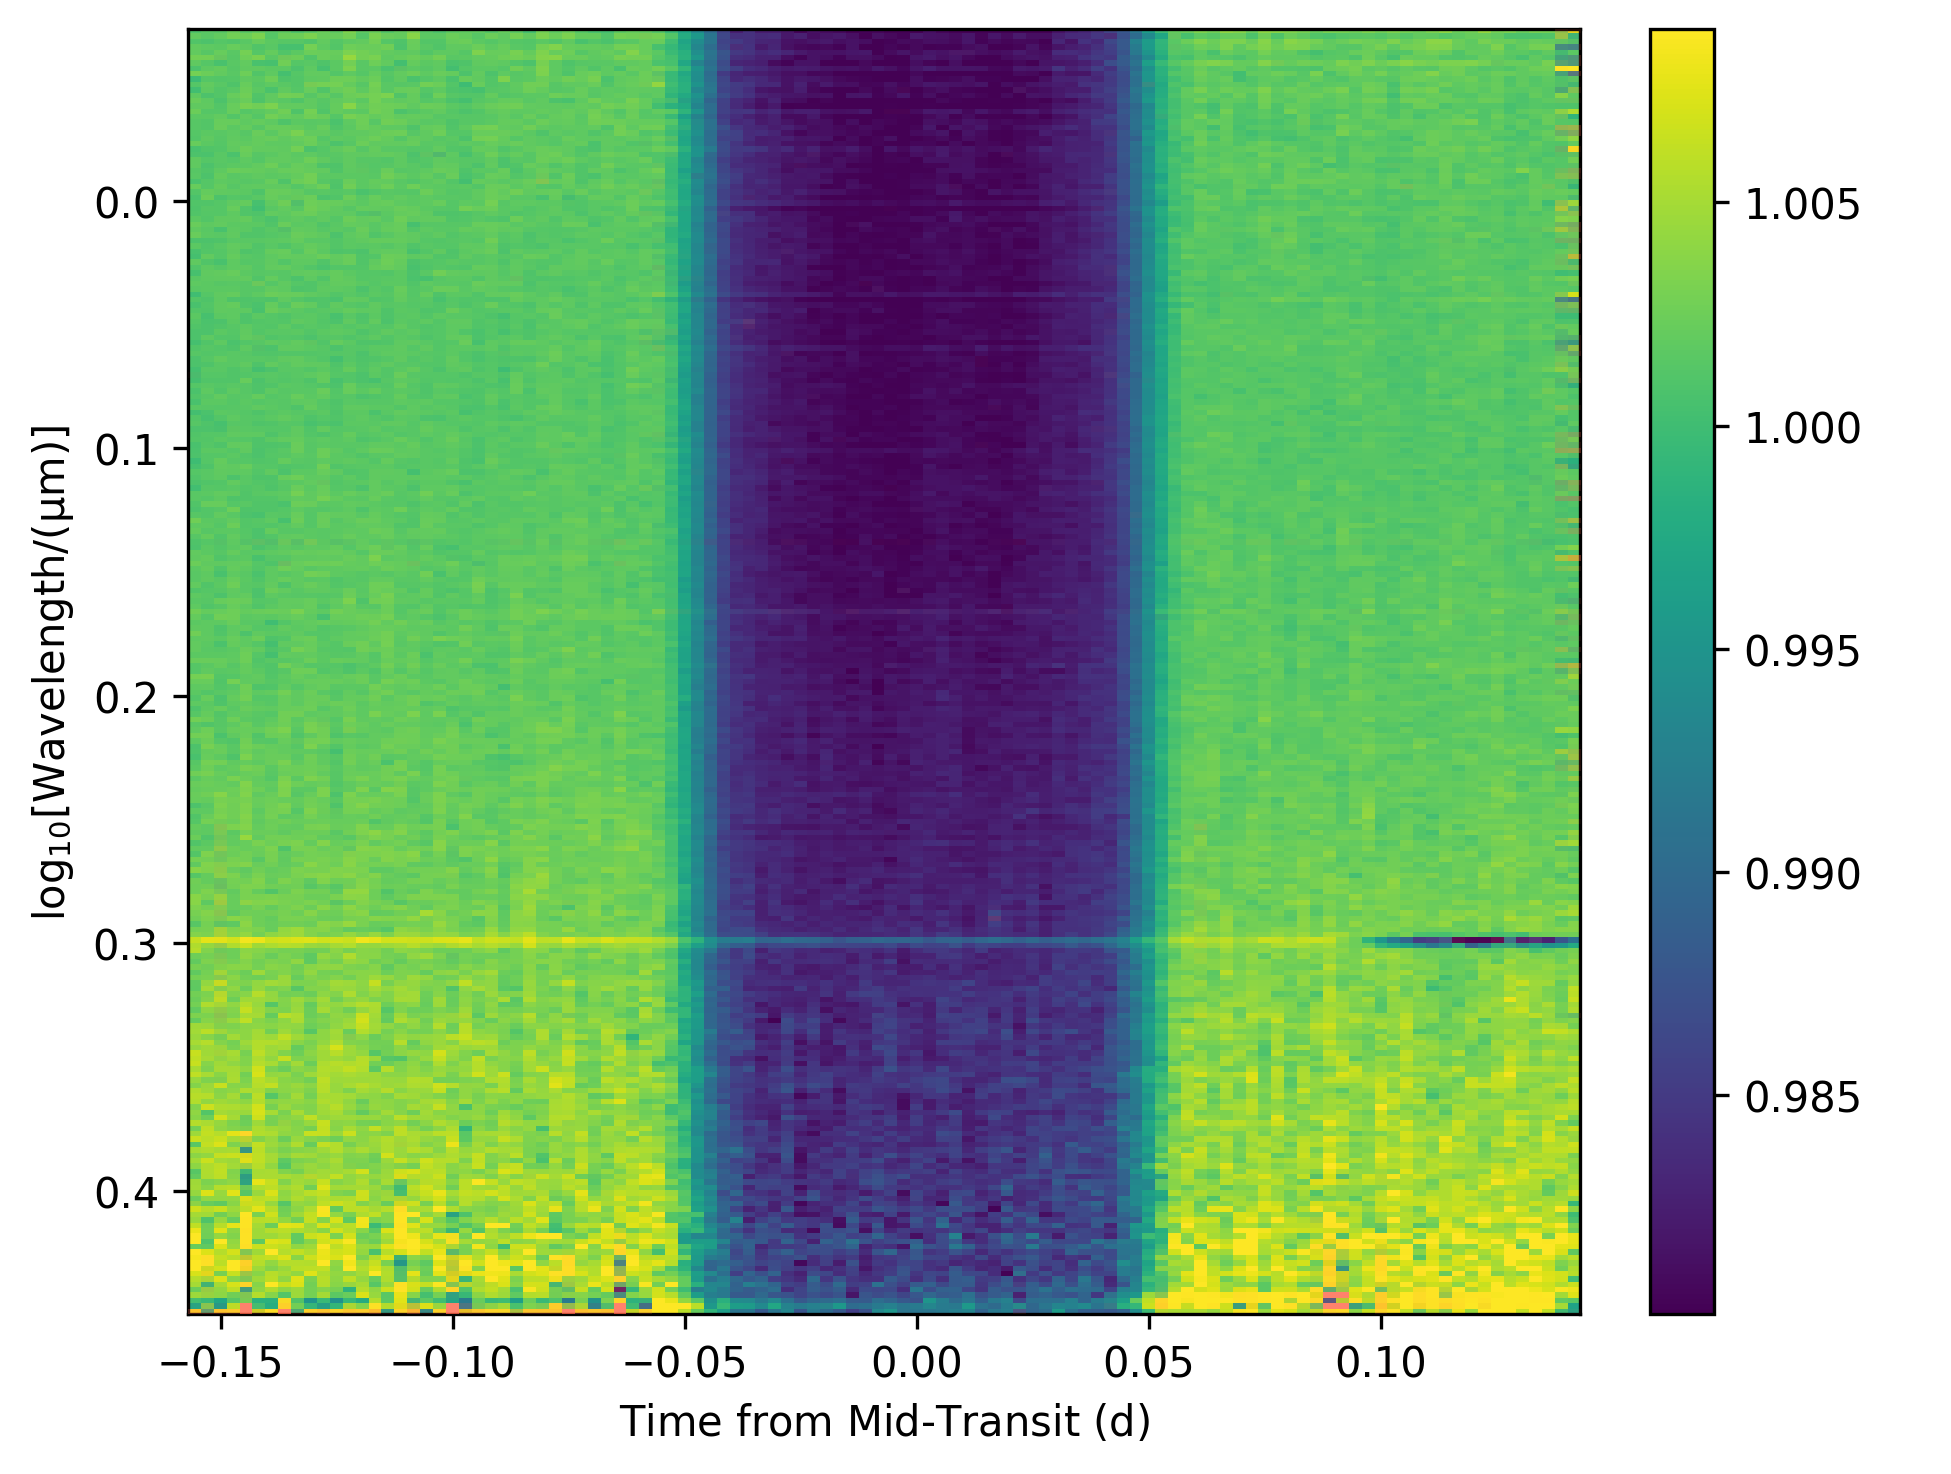

In [5]:
r_bin = rainbow.normalize().flag_outliers().bin(R=200, dt=4 * u.minute)
r_folded = r_bin.fold(period=5.5080232 * u.day, t0=2459033.31735 * u.day)
r_folded.imshow();

  0%|          | 0/469 [00:00<?, ?it/s]

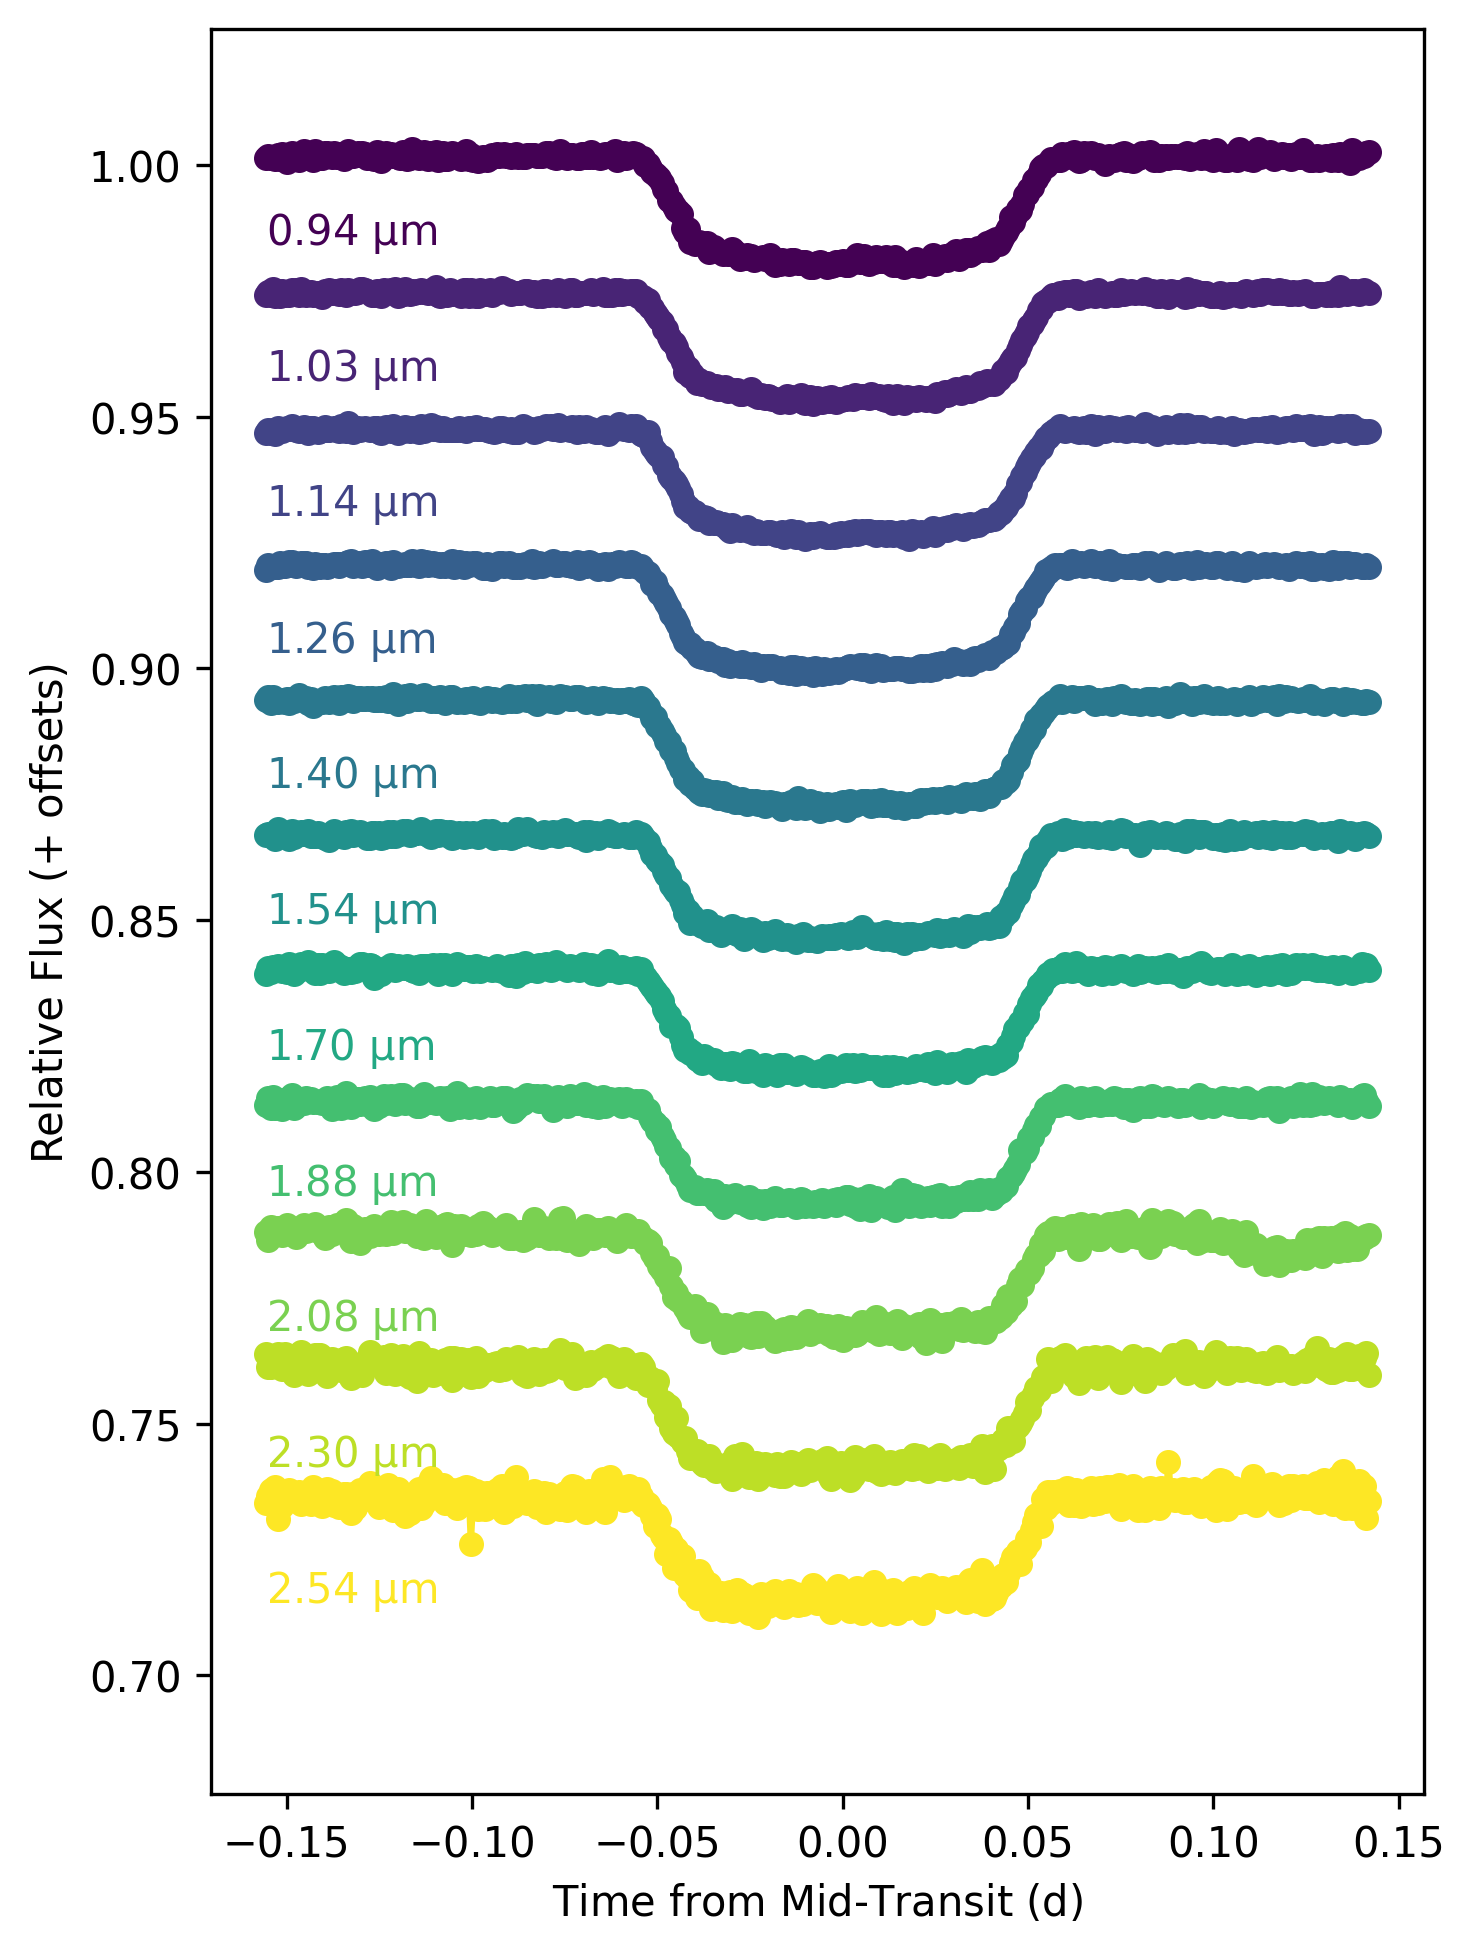

In [6]:
(
    rainbow.normalize()
    .flag_outliers()
    .bin(R=10)
    .fold(period=5.5080232 * u.day, t0=2459033.31735 * u.day)
    .plot()
);

In [6]:
r_hatp18 = rainbow.normalize().flag_outliers().bin(R=5).trim()

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

In [7]:
print(r_hatp18.history())

(
Rainbow(
   filepath='jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits',
   kw={})
.normalize(
   axis='wavelength',
   percentile=50)
.flag_outliers(
   how_many_sigma=5,
   inflate_uncertainty=True)
.bin_in_wavelength(
   R=5,
   minimum_acceptable_ok=1,
   trim=True,
   starting_wavelengths='1D')
.trim_wavelengths(
   just_edges=True,
   when_to_give_up=1,
   minimum_acceptable_ok=1)
.trim_times(
   just_edges=True,
   when_to_give_up=1,
   minimum_acceptable_ok=1)
.trim_wavelengths(
   just_edges=True,
   when_to_give_up=1,
   minimum_acceptable_ok=1)
)
(
Rainbow(
   filepath='jw02734-o001_t001_niriss_clear-gr700xd-substrip256_x1dints.fits',
   kw={})
.normalize(
   axis='wavelength',
   percentile=50)
.flag_outliers(
   how_many_sigma=5,
   inflate_uncertainty=True)
.bin_in_wavelength(
   R=5,
   minimum_acceptable_ok=1,
   trim=True,
   starting_wavelengths='1D')
.trim_wavelengths(
   just_edges=True,
   when_to_give_up=1,
   minimum_acceptable_ok=1)
.trim_times(

# chromatic_fitting

In [8]:
from chromatic_fitting import *

Running chromatic_fitting v0.7.0!

This program is running on:
Python v3.9.12 (main, Jun  1 2022, 06:34:44) 
[Clang 12.0.0 ]
numpy v1.22.1
chromatic v0.3.14
pymc3 v3.11.5
pymc3_ext v0.1.1
exoplanet v0.5.2
Running chromatic_fitting v0.7.0!

This program is running on:
Python v3.9.12 (main, Jun  1 2022, 06:34:44) 
[Clang 12.0.0 ]
numpy v1.22.1
chromatic v0.3.14
pymc3 v3.11.5
pymc3_ext v0.1.1
exoplanet v0.5.2


In [9]:
from chromatic_fitting.version import __version__
__version__

'0.7.0'

'0.7.0'

## Create a Transit Model

In [10]:
# import any prior distributions we want to use for our parameters - I've chosen Normal and Uniform from pymc3
# and QuadLimbDark and ImpactParameter from exoplanet
from pymc3 import Normal, Uniform
from exoplanet import QuadLimbDark, ImpactParameter

Let's start with some transit parameters I've found on the exoplanet archive:

In [11]:
# planet params 
hatp18 = {'period':5.508029, 'r_s':0.717, 'sig_r_s':0.026, 'm_s':0.77, 'sig_m_s':0.031, 'r_p':0.0947, 'b':0.324, 't0':2459743.85}
# wasp39 = {'period':4.05527999, 'r_s':0.932, 'sig_r_s':0.014, 'm_s':0.934, 'sig_m_s':0.056, 'r_p':0.145, 'b':0.44, 't0':2459783.5}
# wasp96 = {'period':1.0, 'r_s':0.9, 'm_s':1, 'r_p':0.1, 'b':0.3}

And for this example I'm going to model HAT-P-18

In [12]:
planet = hatp18

We now can use `chromatic_fitting` to model a transit. The first step is to initialise and then setup our parameters. There are four types of parameters: 
- `Fixed` - A fixed value
- `WavelikeFixed` - A set of fixed values (one for each wavelength)
- `Fitted` - A single value to be fit across all wavelengths,
- `WavelikeFitted` - A set of values to be fit, one for each wavelength

In [13]:
# create transit model:
t = TransitModel()

# add our parameters:
t.setup_parameters(
                  period=planet['period'], # a fixed value!
                   epoch=Fitted(Uniform,lower=planet['t0']-0.05,upper=planet['t0']+0.05), # one fitted value across all wavelengths
                   stellar_radius = Fitted(Normal, mu=planet['r_s'], sigma=planet['sig_r_s']),
                   stellar_mass =Fitted(Normal, mu=planet['m_s'], sigma=planet['sig_m_s']),
                   radius_ratio=WavelikeFitted(Normal, mu=planet['r_p']/planet['r_s'], sigma=0.05), # a different value fitted for every wavelength!
                   impact_parameter=Fitted(ImpactParameter,ror=0.15,testval=planet['b']),
                   limb_darkening=WavelikeFitted(Uniform,testval=[0.2,0.3], shape=2),
                    baseline = WavelikeFitted(Normal, mu=1.0, sigma=0.02), 
                )

# print a summary of all params:
t.summarize_parameters()

transit_stellar_radius =
  <🧮 Fitted Normal(mu=0.717, sigma=0.026, name='transit_stellar_radius') 🧮>

transit_stellar_mass =
  <🧮 Fitted Normal(mu=0.77, sigma=0.031, name='transit_stellar_mass') 🧮>

transit_radius_ratio =
  <🧮 WavelikeFitted Normal(mu=0.13207810320781033, sigma=0.05, name='transit_radius_ratio') for each wavelength 🧮>

transit_period =
  <🧮 Fixed | 5.508029 🧮>

transit_epoch =
  <🧮 Fitted Uniform(lower=2459743.8000000003, upper=2459743.9, name='transit_epoch') 🧮>

transit_baseline =
  <🧮 WavelikeFitted Normal(mu=1.0, sigma=0.02, name='transit_baseline') for each wavelength 🧮>

transit_impact_parameter =
  <🧮 Fitted ImpactParameter(ror=0.15, testval=0.324, name='transit_impact_parameter') 🧮>

transit_eccentricity =
  <🧮 Fixed | 0.0 🧮>

transit_omega =
  <🧮 Fixed | 0 🧮>

transit_limb_darkening =
  <🧮 WavelikeFitted Uniform(testval=[0.2, 0.3], shape=2, name='transit_limb_darkening') for each wavelength 🧮>

transit_stellar_radius =
  <🧮 Fitted Normal(mu=0.717, sigma=0.026,

In [69]:
# attach the Rainbow object to the model:
t.attach_data(r_hatp18)

# this is the last point where we can change the optimization method:
# t.choose_optimization_method("separate")
# t.choose_optimization_method("white_light")

# setup the lightcurves for the transit model:
t.setup_lightcurves()

# relate the "actual" data to the model (using a Normal likelihood function)
t.setup_likelihood()

  0%|          | 0/1 [00:00<?, ?it/s]

## Check it looks okay...

In [70]:
print(t._pymc3_model)

         transit_epoch_interval__ ~ TransformedDistribution
transit_impact_parameter_impact__ ~ TransformedDistribution
           transit_stellar_radius ~ Normal
             transit_stellar_mass ~ Normal
transit_limb_darkening_interval__ ~ TransformedDistribution
             transit_radius_ratio ~ Normal
                 transit_baseline ~ Normal
                    transit_epoch ~ Uniform
         transit_impact_parameter ~ ImpactParameter
                     transit_a_R* ~ Deterministic
           transit_limb_darkening ~ Uniform
                             data ~ Normal


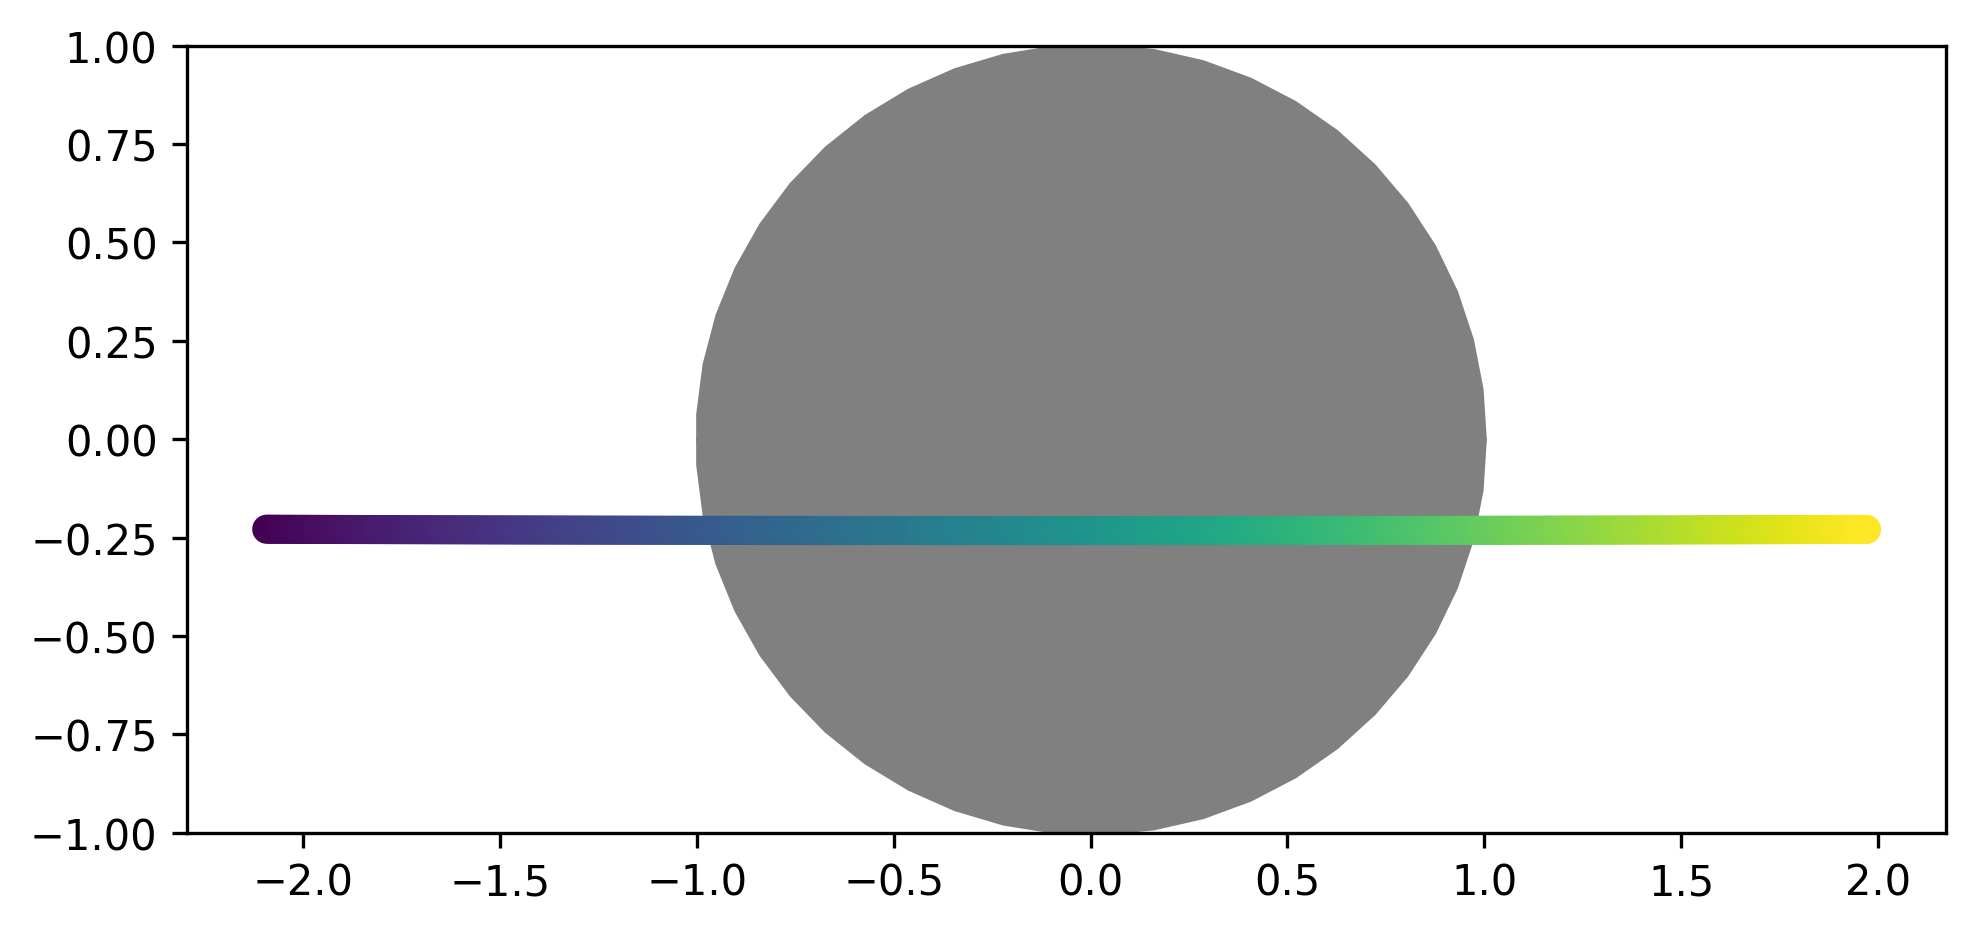

In [71]:
t.plot_orbit()

The summarize step has not been run yet. To include the 'best-fit' model please run {self}.sample() and {self}.summarize() before calling this step!


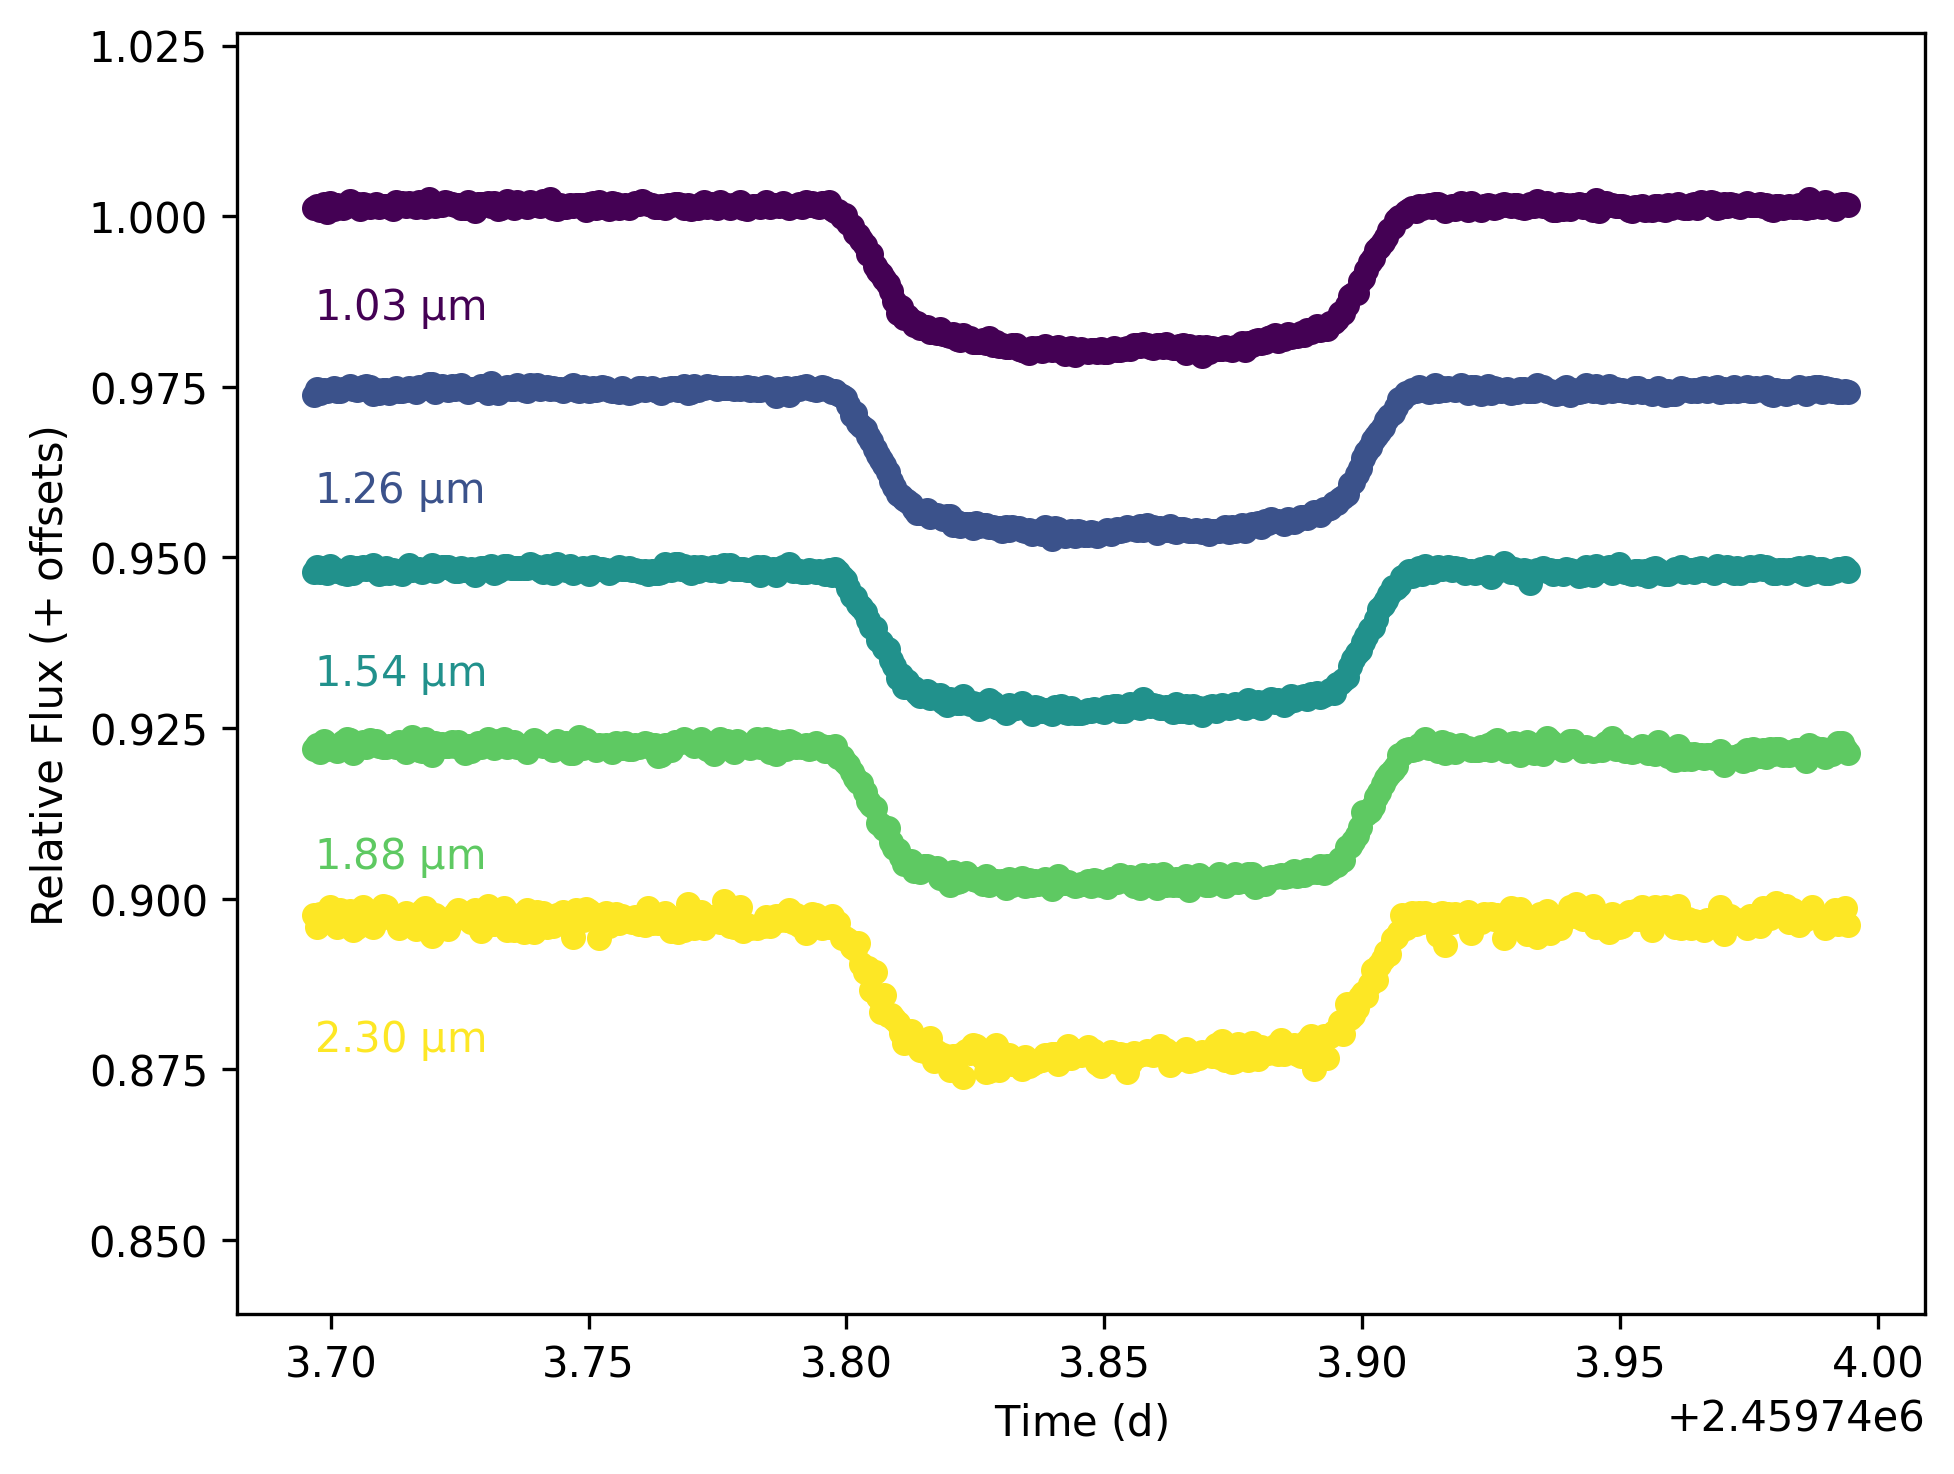

In [72]:
t.plot_lightcurves()

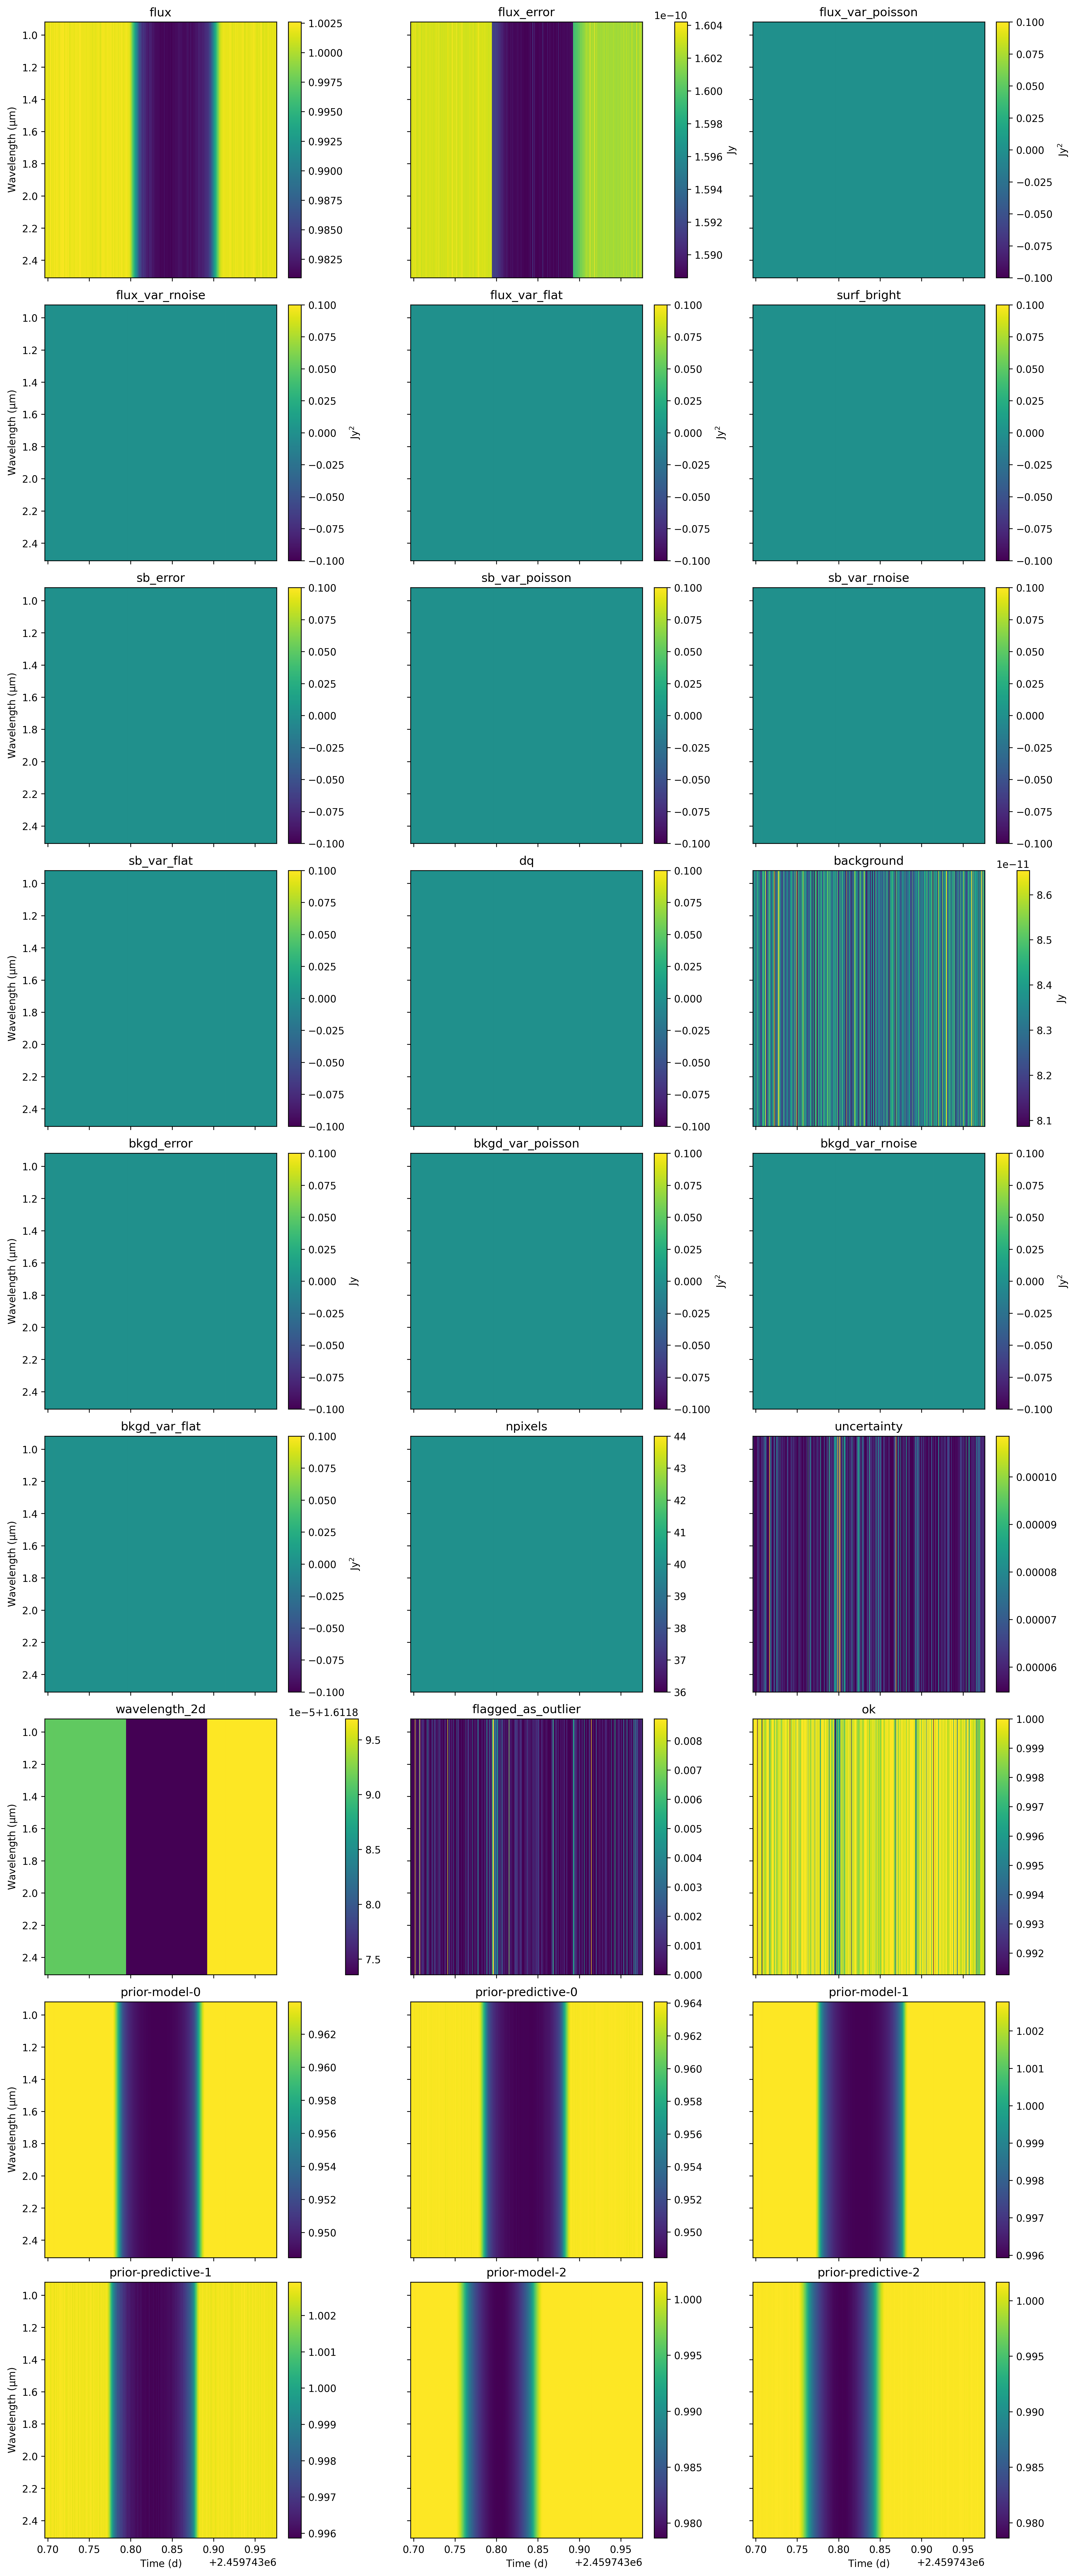

In [24]:
t.plot_priors(n=3)

## Use MCMC (PyMC3) to Sample the Parameter Distributions

In [73]:
# optimize for initial values!
opt = t.optimize(plot=False)

# put those initial values into the sampling and define the number of tuning and draw steps, 
# as well as the number of chains. NOTE: if you do separate wavelength fitting then the number of steps 
# is per wavelengths, not divided between the wavelengths!
t.sample(start=opt, tune=2000, draws=3000, chains=4, cores=4) 

optimizing logp for variables: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


 |████████████████████████████████████████| 100.00% [197/197 00:00<00:00 logp = -2.199e+01]


message: Desired error not necessarily achieved due to precision loss.
logp: -372359.0842415537 -> -21.98955157690547
/Users/camu5866/opt/anaconda3/envs/spec_meeting/lib/python3.9/site-packages/pymc3_ext/sampling/sampling.py:109: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return pm.sample(draws=draws, tune=tune, model=model, step=step, **kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 72 seconds.
The acceptance probability does not match the target. It is 0.9688444061551874, but should be close to 0.9. Try to increase the number of tuning steps.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [74]:
t.summarize(round_to=7, hdi_prob=0.68, fmt='wide')

                                      mean        sd       hdi_16%  \
transit_stellar_radius[0]     7.207970e-01  0.008913  7.123461e-01   
transit_stellar_mass[0]       7.690960e-01  0.028407  7.411254e-01   
transit_radius_ratio[0]       1.361726e-01  0.000121  1.360547e-01   
transit_radius_ratio[1]       1.361691e-01  0.000113  1.360614e-01   
transit_radius_ratio[2]       1.359649e-01  0.000110  1.358576e-01   
transit_radius_ratio[3]       1.349697e-01  0.000110  1.348665e-01   
transit_radius_ratio[4]       1.369828e-01  0.000128  1.368497e-01   
transit_baseline[0]           1.001529e+00  0.000006  1.001523e+00   
transit_baseline[1]           1.001421e+00  0.000006  1.001416e+00   
transit_baseline[2]           1.001799e+00  0.000006  1.001792e+00   
transit_baseline[3]           1.002571e+00  0.000009  1.002562e+00   
transit_baseline[4]           1.004240e+00  0.000012  1.004228e+00   
transit_epoch[0]              2.459744e+06  0.000007  2.459744e+06   
transit_impact_param

In [75]:
results = t.get_results(uncertainty='sd')

In [76]:
results

transit_baseline transit_baseline_sd transit_eccentricity  \
w0         1.001529            0.000006                  0.0   
w1         1.001421            0.000006                  0.0   
w2         1.001799            0.000006                  0.0   
w3         1.002571            0.000009                  0.0   
w4          1.00424            0.000012                  0.0   

   transit_eccentricity_sd   transit_epoch transit_epoch_sd  \
w0                     0.0  2459743.853399         0.000007   
w1                     0.0  2459743.853399         0.000007   
w2                     0.0  2459743.853399         0.000007   
w3                     0.0  2459743.853399         0.000007   
w4                     0.0  2459743.853399         0.000007   

   transit_impact_parameter transit_impact_parameter_sd  \
w0                 0.352407                    0.004733   
w1                 0.352407                    0.004733   
w2                 0.352407                    0.004733   
w3                 0.352407                    0.004733   
w4                 0.352407                    0.004733   

    transit_limb_darkening transit_limb_darkening_sd  ... transit_omega_sd  \
w0  [0.1909169, 0.4258682]    [0.0109819, 0.0197815]  ...                0   
w1  [0.1111652, 0.4883496]    [0.0103674, 0.0194041]  ...                0   
w2  [0.0294652, 0.5225246]    [0.0117981, 0.0212794]  ...                0   
w3  [0.0082597, 0.4646614]    [0.0070458, 0.0144389]  ...                0   
w4   [0.002375, 0.4452142]    [0.0022943, 0.0108585]  ...                0   

   transit_period transit_period_sd transit_radius_ratio  \
w0       5.508029          5.508029             0.136173   
w1       5.508029          5.508029             0.136169   
w2       5.508029          5.508029             0.135965   
w3       5.508029          5.508029              0.13497   
w4       5.508029          5.508029             0.136983   

   transit_radius_ratio_sd transit_stellar_mass transit_stellar_mass_sd  \
w0                0.000121             0.769096                0.028407   
w1                0.000113             0.769096                0.028407   
w2                 0.00011             0.769096                0.028407   
w3                 0.00011             0.769096                0.028407   
w4                0.000128             0.769096                0.028407   

   transit_stellar_radius transit_stellar_radius_sd                 wavelength  
w0               0.720797                  0.008913  1.0335468131073784 micron  
w1               0.720797                  0.008913  1.2623769282170056 micron  
w2               0.720797                  0.008913  1.5418706619620135 micron  
w3               0.720797                  0.008913    1.88324507924665 micron  
w4               0.720797                  0.008913   2.300200734083426 micron  

[5 rows x 21 columns]

In [77]:
models = t.get_model()
models.keys()

dict_keys(['w0', 'w1', 'w2', 'w3', 'w4'])

## Plot results

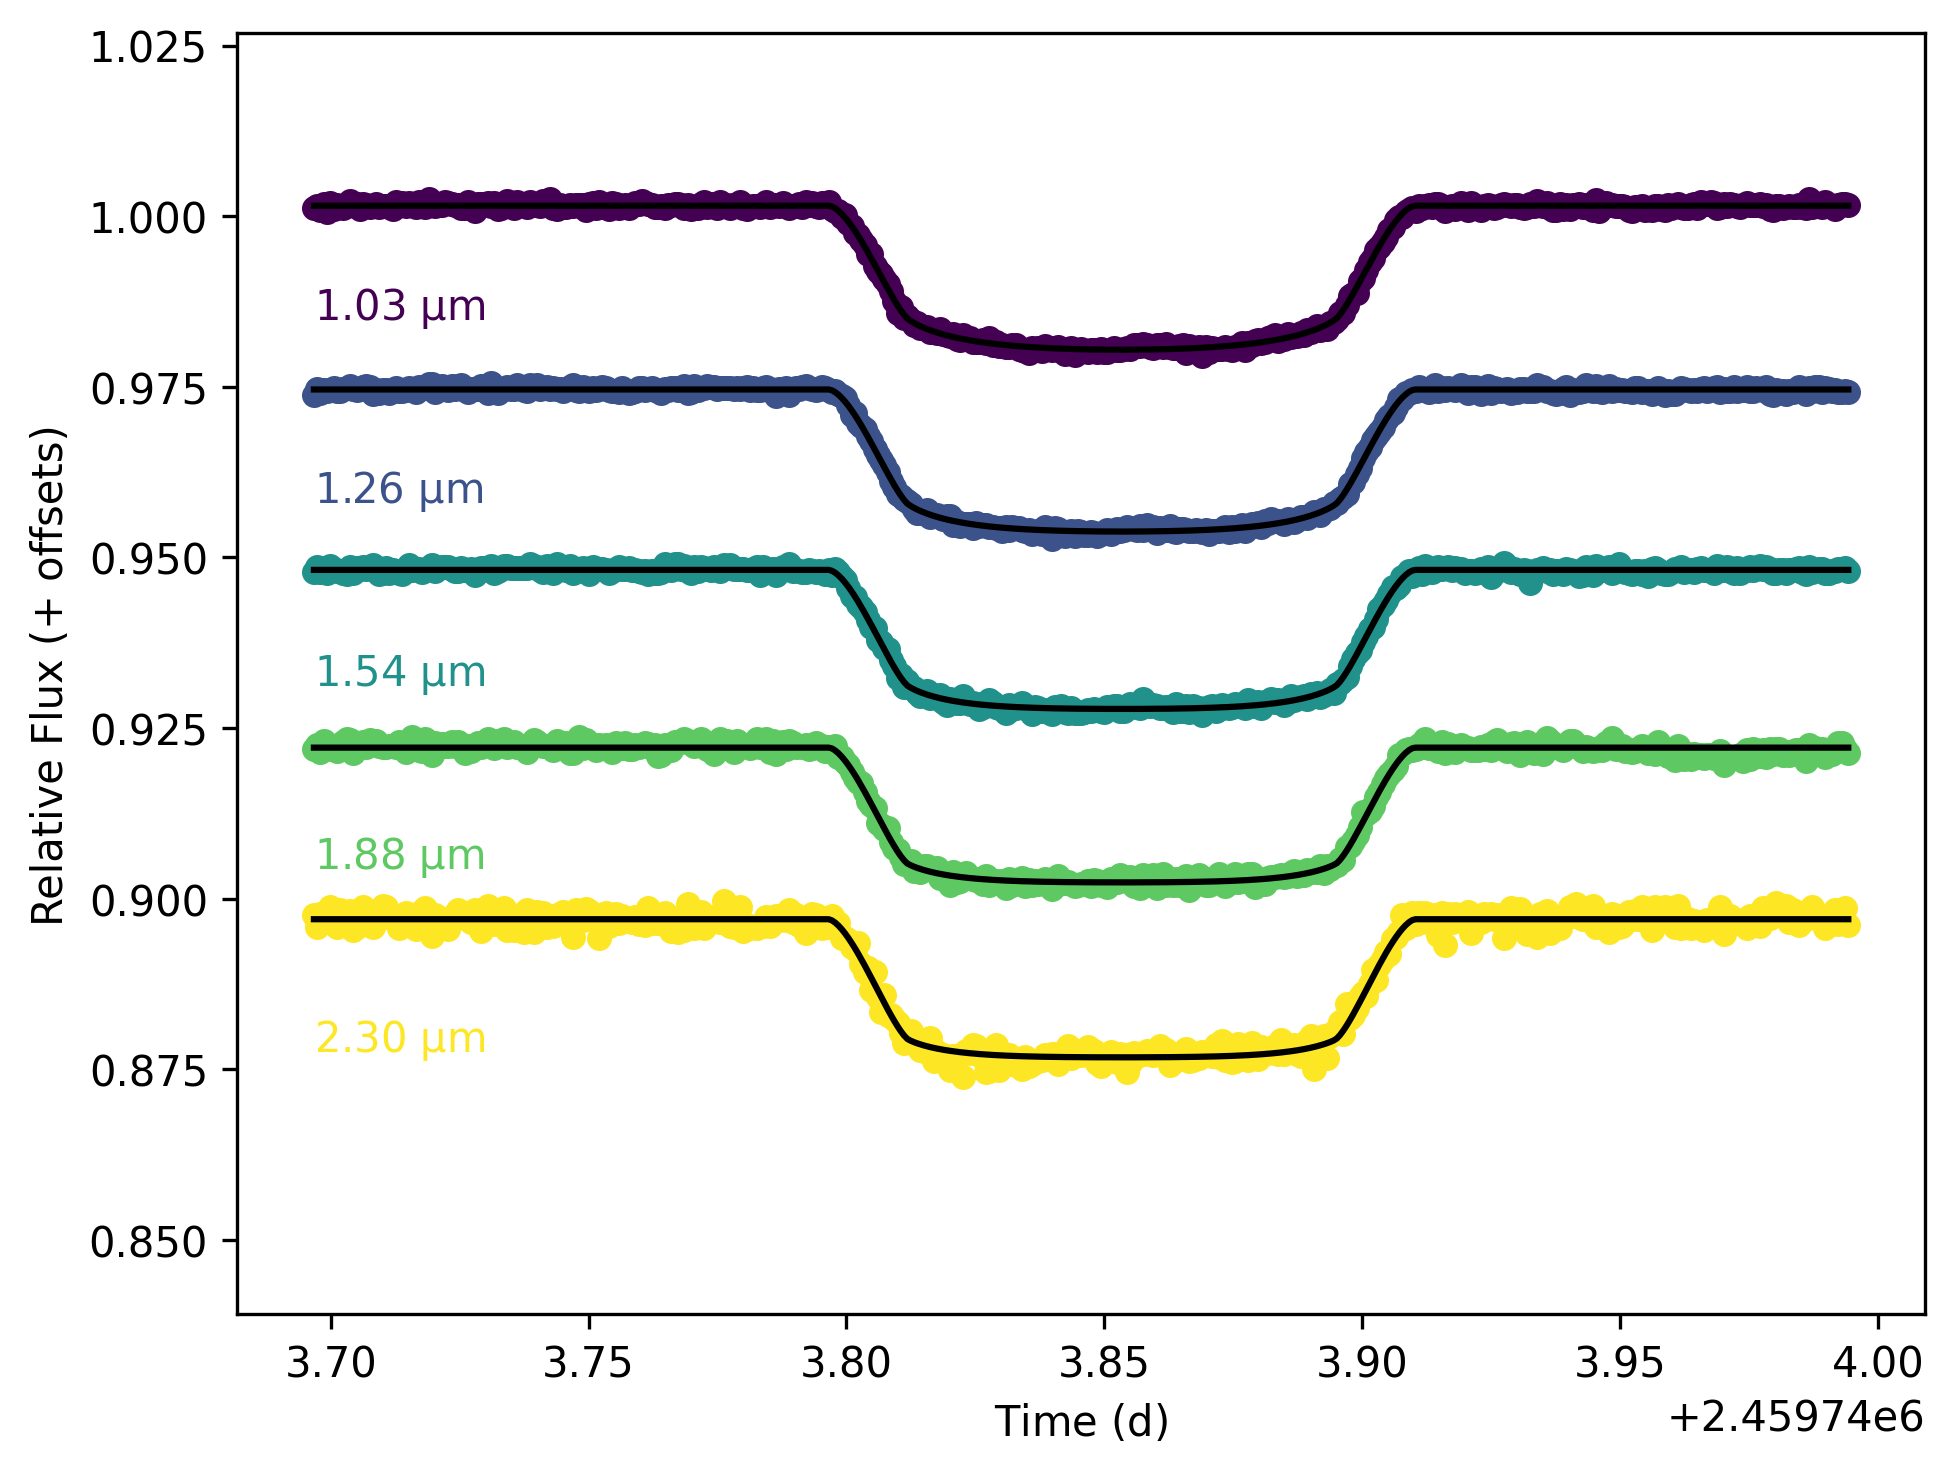

In [78]:
t.plot_lightcurves()

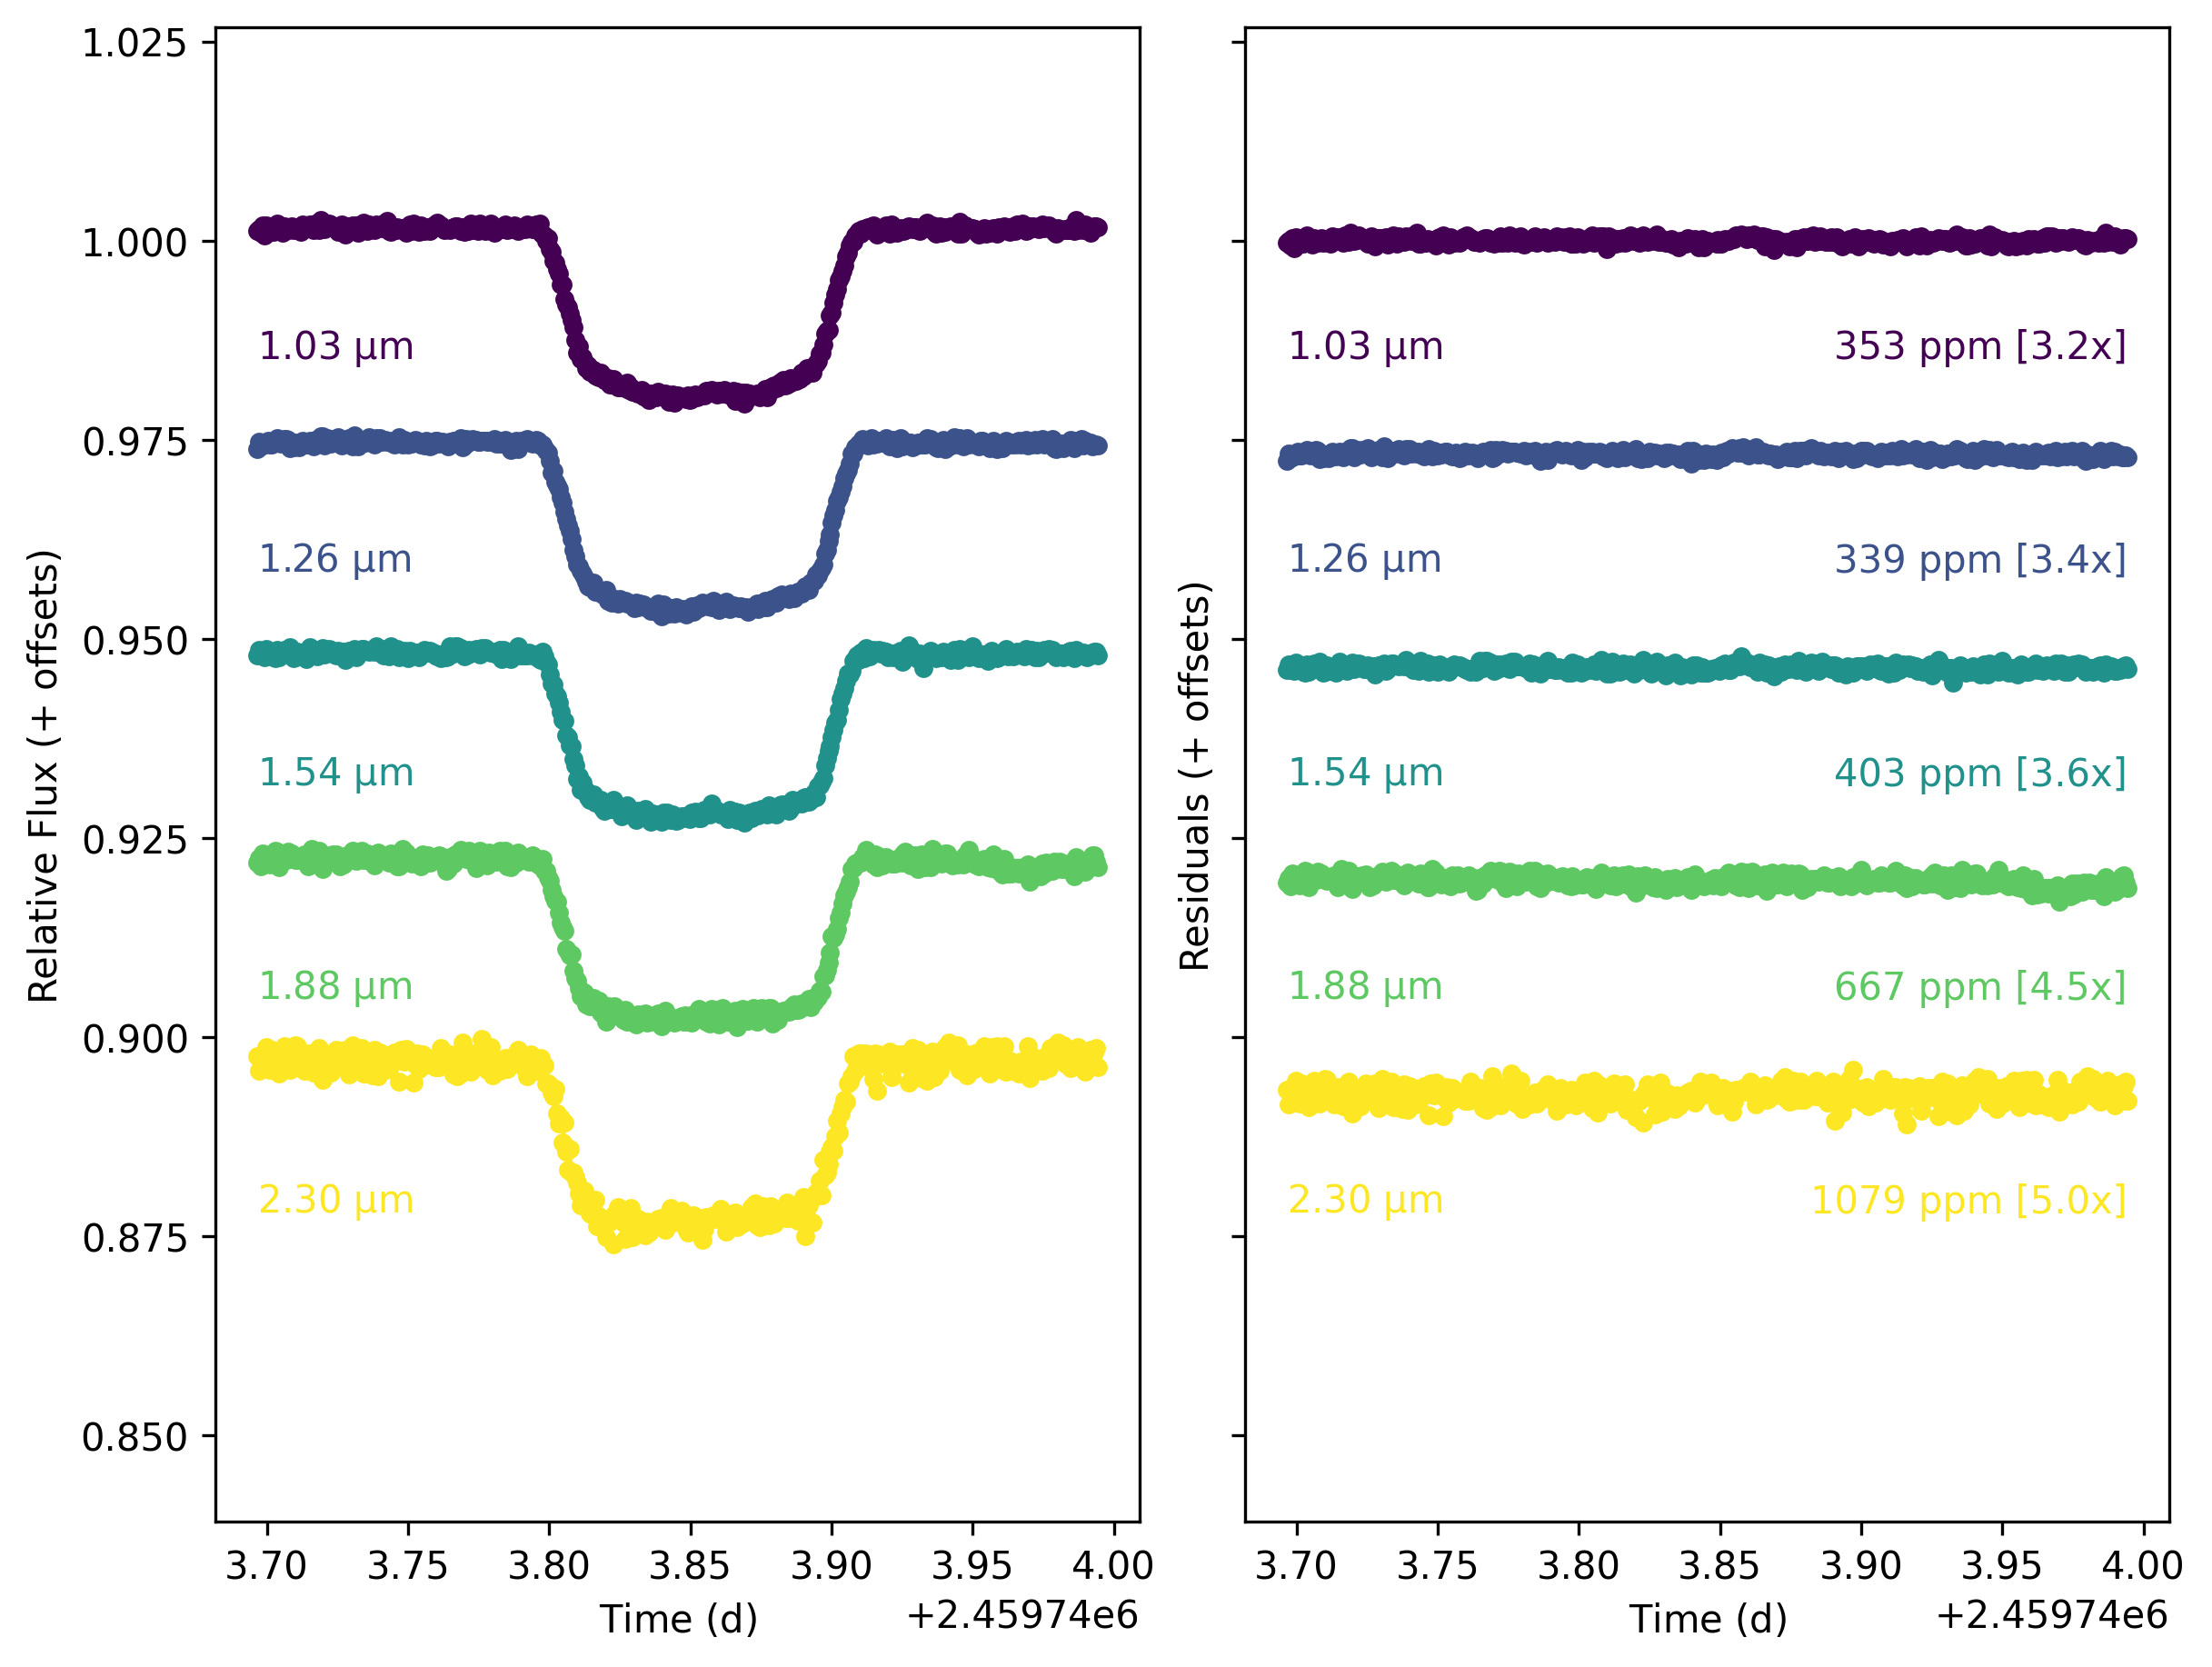

In [81]:
t.plot_with_model_and_residuals(histogram=False)

🌈🤖 'systematics_model' doesn't exist and will be skipped.



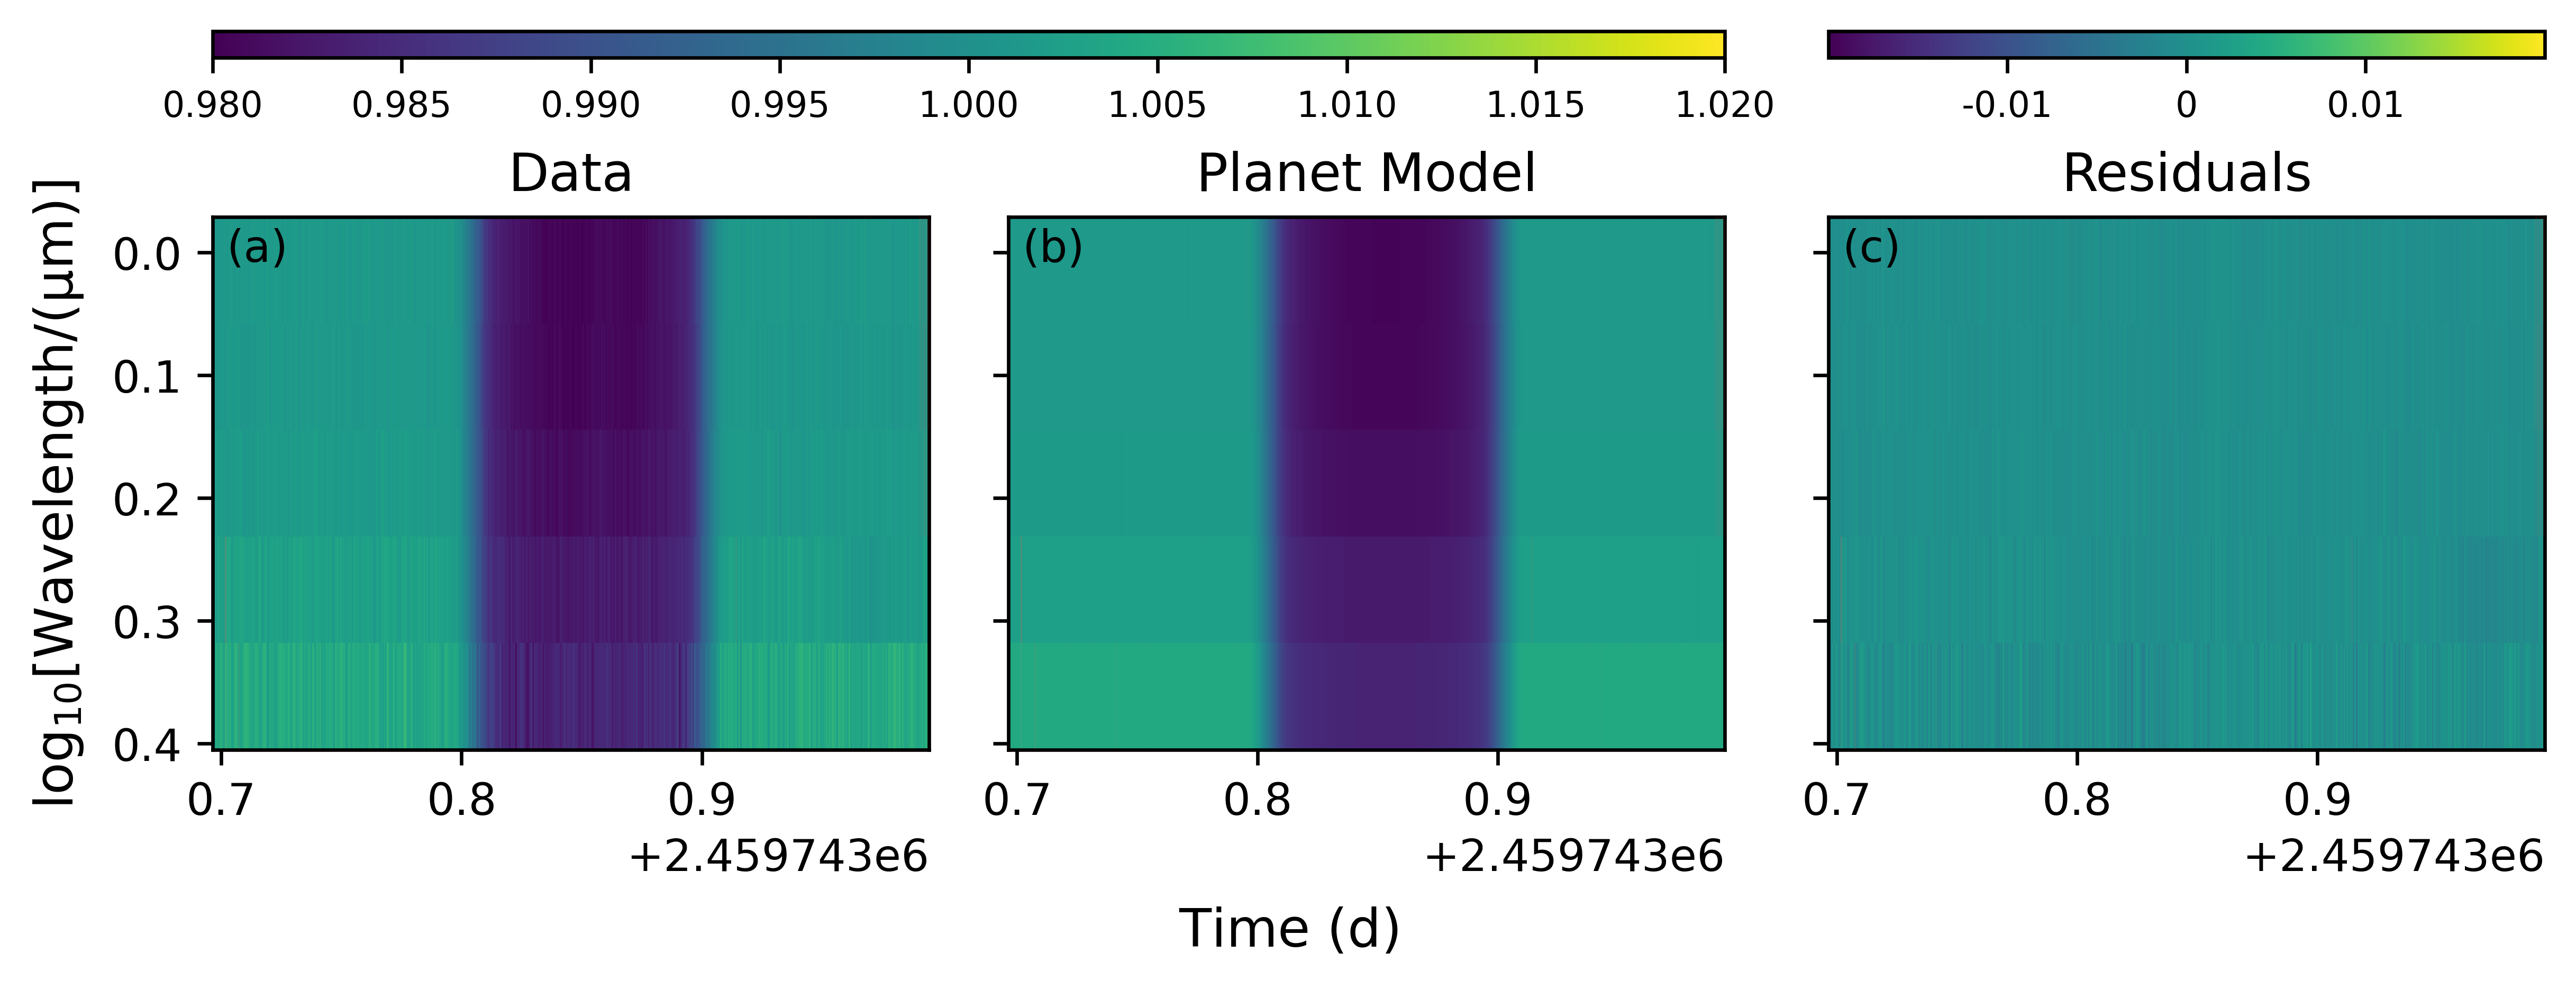

In [82]:
t.imshow_with_models()

In [ ]:
t.corner_plot()

In [34]:
t.plot_posteriors()

/Users/camu5866/opt/anaconda3/envs/spec_meeting/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


## Produce the Transmission Spectrum...

/Users/camu5866/opt/anaconda3/envs/spec_meeting/lib/python3.9/site-packages/chromatic_fitting/models/transit.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_table[f"{self.name}_radius_ratio_neg_error"] = (


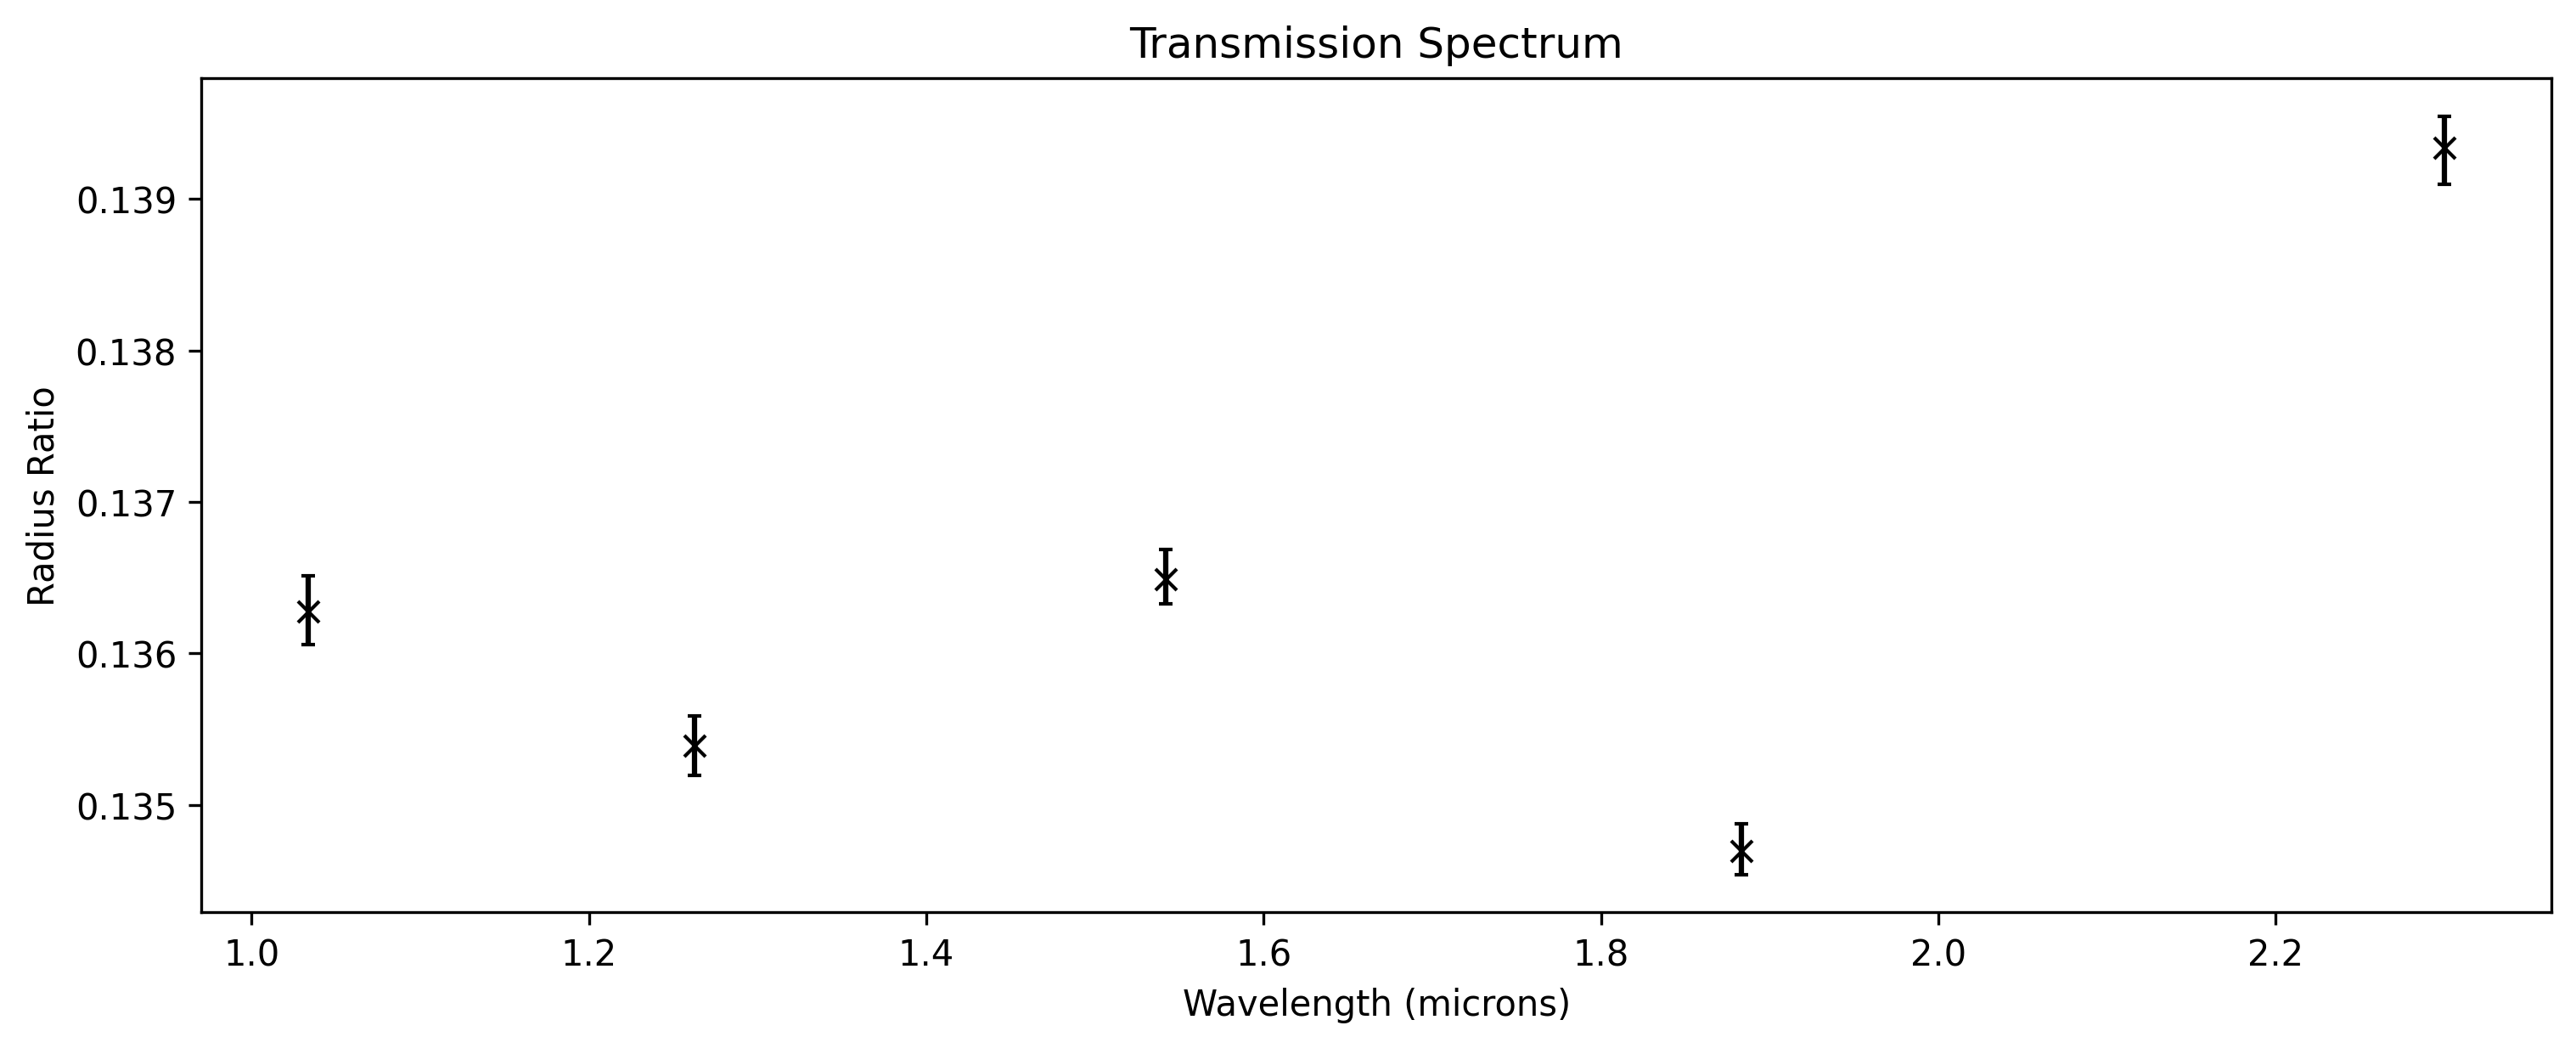

In [53]:
t.plot_transmission_spectrum(uncertainty=["hdi_16%", "hdi_84%"])

# For fun - try adding in a trapezoid model for the spot...?

In [30]:
# set up transit model:
t2 = TransitModel()
t2.setup_parameters(
                  period=planet['period'], # a fixed value!
                   epoch=Fitted(Uniform,lower=planet['t0']-0.05,upper=planet['t0']+0.05), # one fitted value across all wavelengths
                   stellar_radius = Fitted(Normal, mu=planet['r_s'], sigma=planet['sig_r_s']),
                   stellar_mass =Fitted(Normal, mu=planet['m_s'], sigma=planet['sig_m_s']),
                   radius_ratio=WavelikeFitted(Normal, mu=planet['r_p']/planet['r_s'], sigma=0.05), # a different value fitted for every wavelength!
                   impact_parameter=Fitted(ImpactParameter,ror=0.15,testval=planet['b']),
                   limb_darkening=WavelikeFitted(Uniform,testval=[0.2,0.3], shape=2),
                    baseline = WavelikeFitted(Normal, mu=1.0, sigma=0.02), 
                )

# set up very basic spot model:
s = TrapezoidModel(name="spot")

s.setup_parameters(
    baseline = 1.0, #Fitted(Uniform,testval=1.0,upper=1.02,lower=0.98),
    delta = WavelikeFitted(Uniform,testval=0.001,upper=0.01,lower=0.00),
    t0 = Fitted(Uniform,lower=planet['t0']-0.005,upper=planet['t0']+0.005),
    P = 1.0,
    T = Fitted(Uniform,testval=0.01,upper=0.02,lower=0),
    tau = Fitted(Uniform,testval=0.0001,upper=0.01,lower=0),
)

# s = SpotModel()
# s.setup_parameters(
#     contrast = WavelikeFitted(Uniform, lower=0.0, upper=1.0, testval=0.05),
#     radius = WavelikeFitted(Uniform, lower=0.0, upper=10.0, testval=15.0),
#     latitude = Fitted(Uniform, lower=-90.0, upper=90.0, testval=0.1),
#     longitude = Fitted(Uniform,lower=-180.0, upper=180.0, testval=0.1),
#     inclination = 88.79,
#     prot = 1.0
# )

In [31]:
cmod = t2 / s

/Users/camu5866/opt/anaconda3/envs/chromaticfitting/lib/python3.9/site-packages/chromatic_fitting/models/lightcurve.py:182: UserWarning: transit in the parameter name: transit_stellar_radius. Please avoid having the model name in the parameter name as it can get confusing!
  warnings.warn(
/Users/camu5866/opt/anaconda3/envs/chromaticfitting/lib/python3.9/site-packages/chromatic_fitting/models/lightcurve.py:182: UserWarning: spot in the parameter name: spot_delta. Please avoid having the model name in the parameter name as it can get confusing!
  warnings.warn(
/Users/camu5866/opt/anaconda3/envs/chromaticfitting/lib/python3.9/site-packages/chromatic_fitting/models/lightcurve.py:182: UserWarning: transit in the parameter name: transit_stellar_radius. Please avoid having the model name in the parameter name as it can get confusing!
  warnings.warn(
/Users/camu5866/opt/anaconda3/envs/chromaticfitting/lib/python3.9/site-packages/chromatic_fitting/models/lightcurve.py:182: UserWarning: spot 

In [32]:
# attach the Rainbow object to the model:
cmod.attach_data(r_hatp18)

# this is the last point where we can change the optimization method:
# t.choose_optimization_method("separate")
# t.choose_optimization_method("white_light")

# setup the lightcurves for the transit model:
cmod.setup_lightcurves()
# t.white_light = t.white_light.trim()

# relate the "actual" data to the model (using a Normal likelihood function)
cmod.setup_likelihood()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# optimize for initial values!
opt = cmod.optimize(plot=False)

# put those initial values into the sampling and define the number of tuning and draw steps, 
# as well as the number of chains. NOTE: if you do separate wavelength fitting then the number of steps 
# is per wavelengths, not divided between the wavelengths!
cmod.sample(start=opt, tune=3000, draws=4000, chains=4, cores=4) 

optimizing logp for variables: [spot_T, spot_tau, spot_delta, spot_t0, transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


optimizing logp for variables: [spot_T, spot_tau, spot_delta, spot_t0, transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]


message: Desired error not necessarily achieved due to precision loss.
logp: -828712.6494913526 -> -586.3010363643612
message: Desired error not necessarily achieved due to precision loss.
logp: -828712.6494913526 -> -586.3010363643612
/Users/camu5866/opt/anaconda3/envs/chromaticfitting/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [spot_T, spot_tau, spot_delta, spot_t0, transit_baseline, transit_radius_ratio, transit_limb_darkening, transit_stellar_mass, transit_stellar_radius, transit_impact_parameter, transit_epoch]
/Users/camu5866/opt/anaconda3/envs/chromaticfitting/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz

/Users/camu5866/opt/anaconda3/envs/chromaticfitting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/camu5866/opt/anaconda3/envs/chromaticfitting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/camu5866/opt/anaconda3/envs/chromaticfitting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/camu5866/opt/anaconda3/envs/chromaticfitting/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


In [ ]:
cmod.summarize(round_to=7, hdi_prob=0.68, fmt='wide')

In [ ]:
results = cmod.get_results(uncertainty='sd')
results

In [ ]:
cmod.get_model().keys()

In [ ]:
cmod.plot_model()

In [ ]:
cmod.plot_lightcurves()

In [ ]:
cmod.plot_with_model_and_residuals(histogram=False)

In [ ]:
cmod.imshow_with_models()